In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from itertools import cycle
from IPython.display import display
from math import ceil
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
from tslearn.barycenters import dtw_barycenter_averaging
# Modeling
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import ParameterGrid
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
import random
random.seed(7)
np.random.seed(7)
print("setup complete")

setup complete


In [2]:
sales = pd.read_csv('70prod_data.csv',\
                    index_col=0, parse_dates=True)

In [3]:
sales.head()

P_1   P_2   P_3   P_4   P_5   P_6   P_7   P_8   P_9  P_10  ...  \
2014-07-31  2669  3603  3506  1274  1528  2244  1460  2523  2045  1713  ...   
2014-08-31  2794  3405  3279  1449  1526  1970  1423  2660  2065  1774  ...   
2014-09-30  2289  3434  3238  1426  1484  1877  1369  2581  1775  1875  ...   
2014-10-31  2310  3277  3088  1404  1500  1615  1159  2326  1614  1893  ...   
2014-11-30  2559  3396  2921  1329  1384  1796  1395  2351  1749  1678  ...   

            P_61  P_62  P_63  P_64  P_65  P_66  P_67  P_68  P_69  P_70  
2014-07-31  1721  2506  3011  1039  1374  1840  1359  1407  1108  1544  
2014-08-31  1906  2701  3081  1134  1331  1877  1424  1503  1061  1490  
2014-09-30  1979  2618  3004  1160  1327  1827  1357  1449  1049  1465  
2014-10-31  1982  2693  3215  1180  1369  1883  1384  1446  1050  1584  
2014-11-30  2025  2607  3280  1065  1286  1766  1345  1377   988  1518  

[5 rows x 70 columns]

In [4]:
sales.describe().T

count         mean         std     min     25%     50%     75%     max
P_1    63.0  3510.761905  656.364885  2289.0  2997.0  3546.0  3992.0  4885.0
P_2    63.0  4341.333333  671.591874  3152.0  3848.0  4464.0  4810.0  5873.0
P_3    63.0  4448.523810  693.352814  2909.0  4105.5  4607.0  4943.0  5644.0
P_4    63.0  2267.888889  435.481014  1274.0  2065.0  2371.0  2541.5  2974.0
P_5    63.0  2390.111111  489.206009  1252.0  2198.5  2492.0  2705.5  3327.0
...     ...          ...         ...     ...     ...     ...     ...     ...
P_66   63.0  2075.317460  231.814082  1742.0  1877.5  2035.0  2231.0  2591.0
P_67   63.0  1685.857143  275.337556  1294.0  1424.0  1645.0  1928.5  2199.0
P_68   63.0  1649.063492  303.335058   748.0  1427.5  1562.0  1915.5  2243.0
P_69   63.0  1420.682540  313.456218   766.0  1164.0  1538.0  1658.5  1968.0
P_70   63.0  1541.317460  171.466899  1152.0  1443.5  1514.0  1653.0  2010.0

[70 rows x 8 columns]

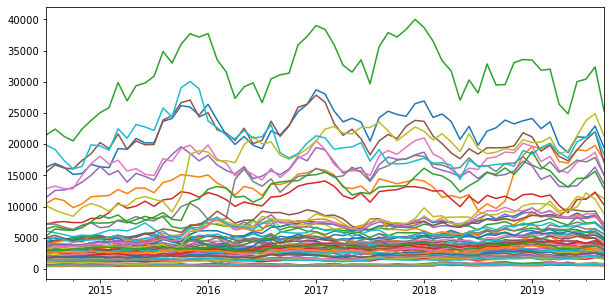

In [5]:
sales.plot(figsize=(10, 5),legend=False)
plt.show()

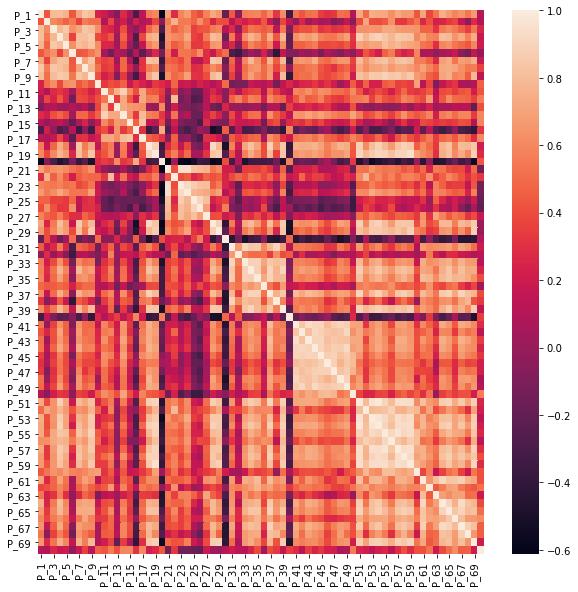

In [6]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(sales.corr())

In [7]:
sales.columns

Index(['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10',
       'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19',
       'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28',
       'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37',
       'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46',
       'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55',
       'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64',
       'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70'],
      dtype='object')

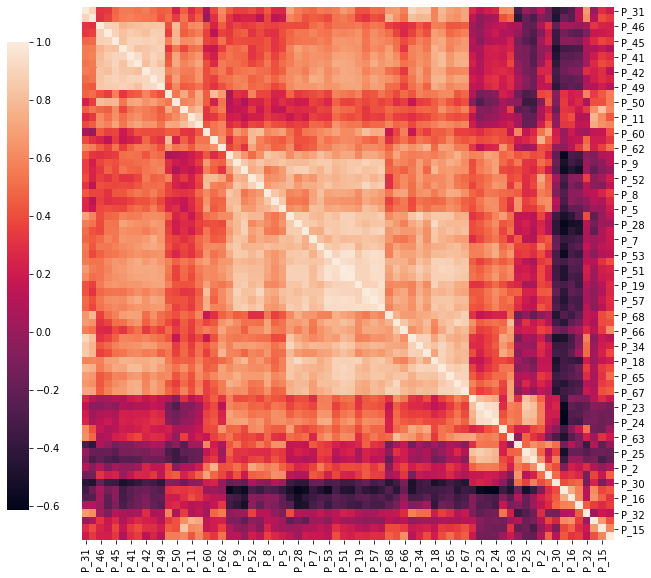

In [8]:
cg = sns.clustermap(sales.corr(), figsize=(10, 10), cbar_pos=(.1, .1, .03, .65))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.show()

On observe une forte correlation entre certains groupes de produits, ce qui suggère qu'on peut les classifier selon leurs comportements de ventes.


## clustering
L'un des problèmes qu'on doit traiter avant de commencer le partitionnement (clustering) est l'échelle de la série. Sans normaliser les données, les séries qui se ressemblent seront vues si différentes les unes des autres et affecteront la précision du processus de clustering. Nous pouvons voir l'effet de la normalisation dans les images suivantes.

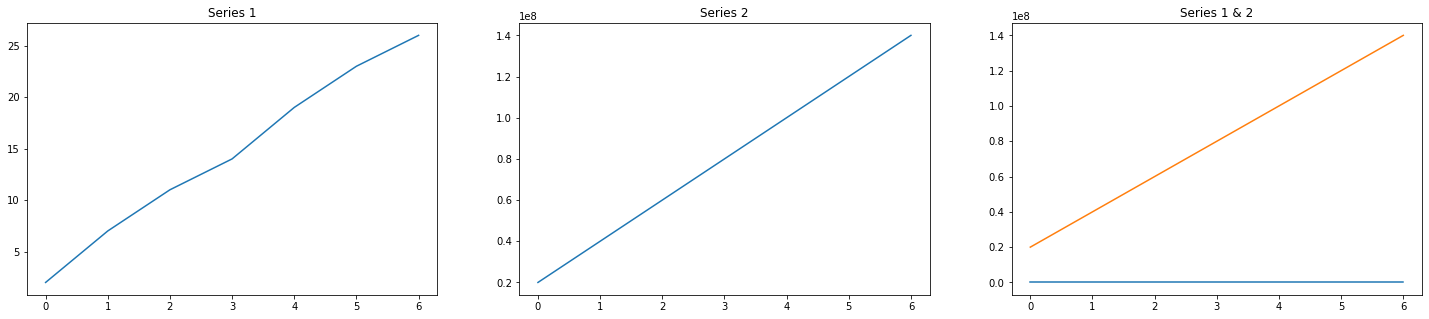

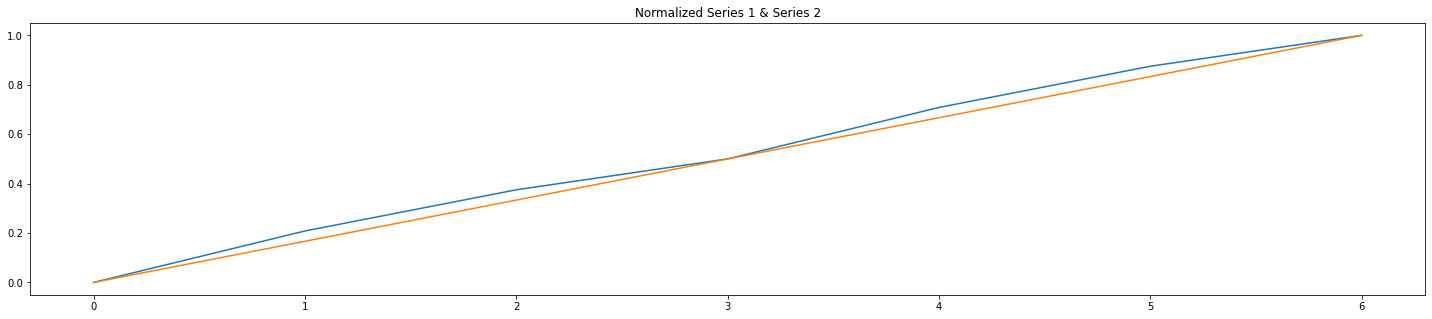

In [9]:
a = [[2],[7],[11],[14],[19],[23],[26]]
b = [[20000000],[40000000],[60000000],[80000000],[100000000],[120000000],[140000000]]
fig, axs = plt.subplots(1,3,figsize=(25,5))
axs[0].plot(a)
axs[0].set_title("Series 1")
axs[1].plot(b)
axs[1].set_title("Series 2")
axs[2].plot(a)
axs[2].plot(b)
axs[2].set_title("Series 1 & 2")
plt.figure(figsize=(25,5))
plt.plot(MinMaxScaler().fit_transform(a))
plt.plot(MinMaxScaler().fit_transform(b))
plt.title("Normalized Series 1 & Series 2")
plt.show()

In [10]:
mySeries = [sales[[col]] for col in sales.columns]
scaler = MinMaxScaler()
for i in range(len(mySeries)):
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

Afin de regrouper nos séries avec des k-moyennes, les indices temporels des séries chronologiques seront considérés comme des caractéristiques différentes et seront les dimensions des points de données(les séries). 

Puisque la longueur des série temporelles en pratique est souvent importante, un autre problème auquel on doit faire face est la malédiction de la dimensionnalité,ce terme a été inventé pour la première fois par Richard E. Bellman lors de l'examen des problèmes de programmation dynamique. Cela signifie essentiellement que lorsque la dimensionnalité des données augmente, la distance entre les points de données augmente également. Ainsi, ce changement de mesure de la distance affecte gravement les algorithmes basés sur la distance.

Pour résoudre ce problème, on va effectuer une analyse en composantes principales ACP avant le partitionnement.

In [11]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(mySeries)

Désormais avec moins de dimensions qu'avant, nous pouvons voir comment nos séries se répartissent en 2 dimensions.

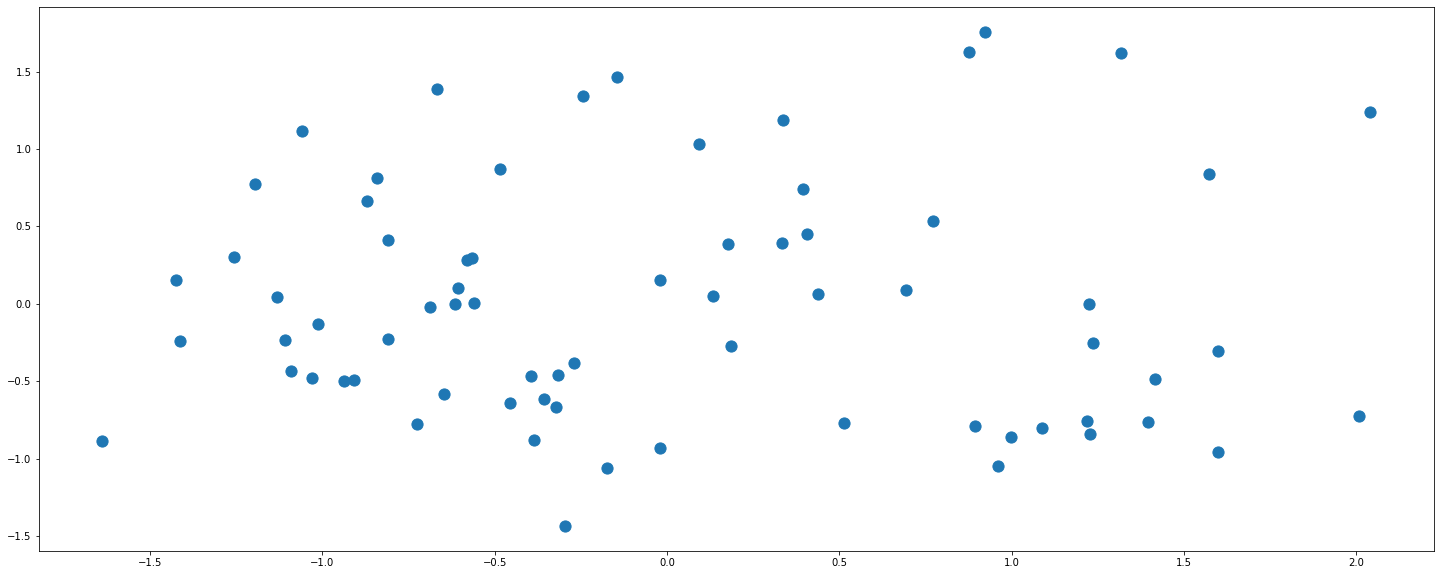

In [12]:
plt.figure(figsize=(25,10))
plt.scatter(pca_res[:,0],pca_res[:,1], s=125)
plt.show()

Kmeans:
Le partitionnement en k-moyennes (ou k-means en anglais) est une méthode de partitionnement de données et un problème d'optimisation combinatoire. Étant donnés des points et un entier k, le problème est de diviser les points en k groupes, souvent appelés clusters, de façon à minimiser une certaine fonction. On considère la distance d'un point à la moyenne des points de son cluster (centroid) ; la fonction à minimiser est la somme des carrés de ces distances,la distance euclidienne est souvent utilisée.

Initialement on va éstimer le nombre de clusters requis par la racine du nombre des points (séries), on obtient 9 clusters.

In [13]:
cluster_count = math.ceil(math.sqrt(len(mySeries))) 
cluster_count

9

et on va appliquer la méthode de Kmeans sur le résultat de l'ACP.

In [14]:
kmeans = KMeans(n_clusters=cluster_count,max_iter=50000)
labels = kmeans.fit_predict(pca_res)

Après l'entrainement du modèle, on a présenté les résultats. Pour chaque cluster, on a tracé les séries en gris, et afin de visualiser le mouvement et le comportement des séries appartenant au même cluster, on a pris la moyenne du cluster et tracé cette série moyenne en rouge.

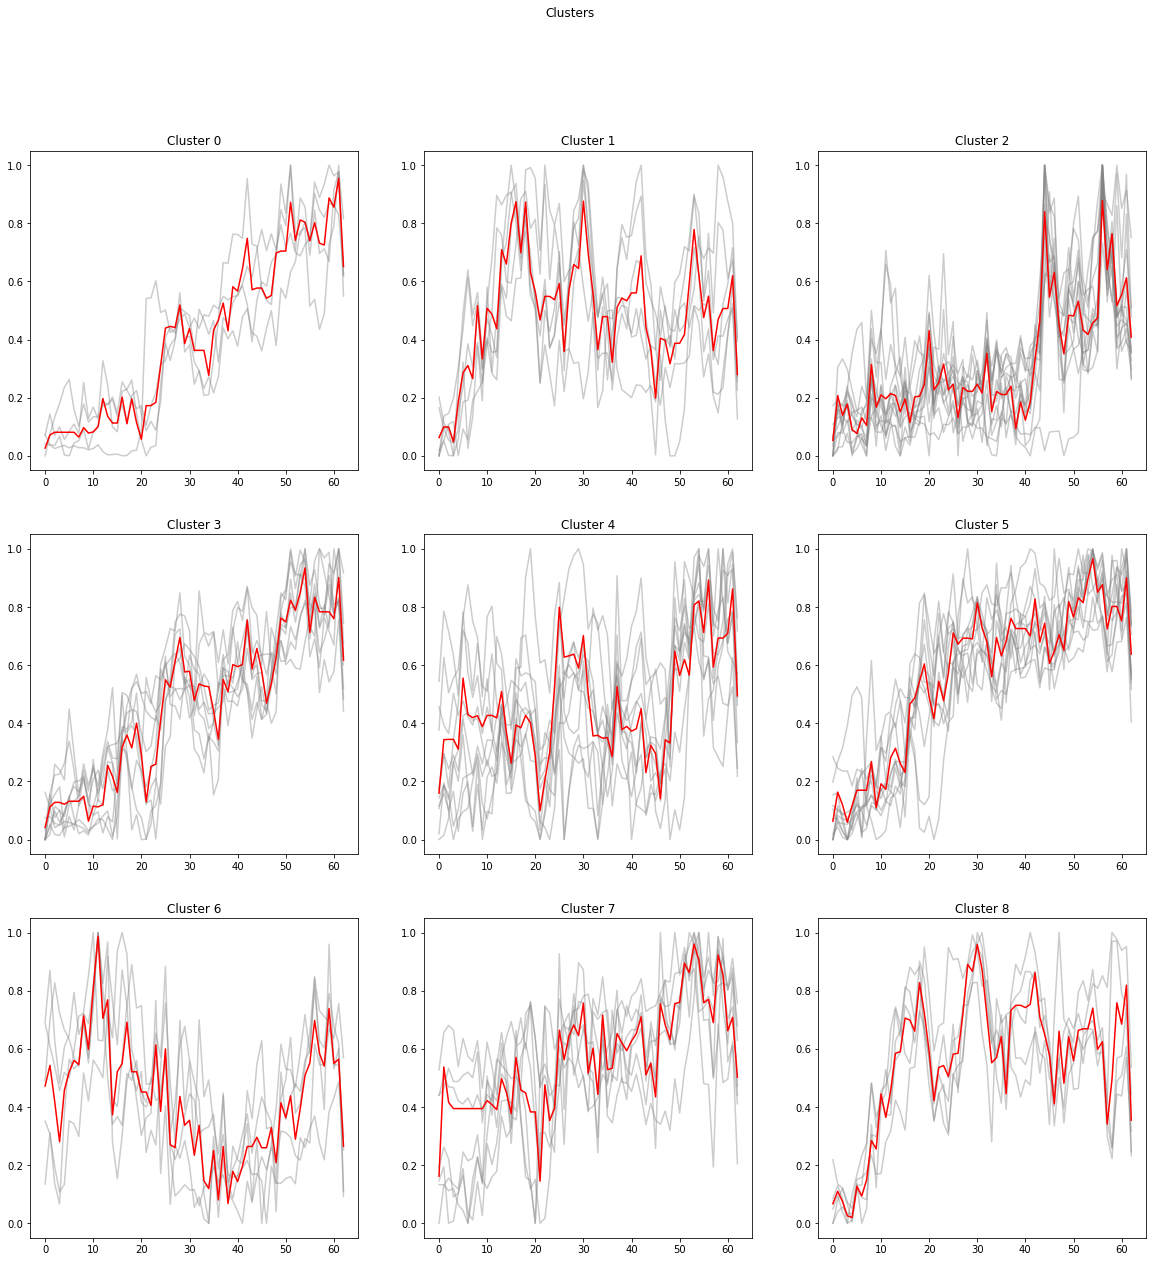

In [15]:
som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries))))
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(20,20))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        #axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red") 
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.show()

Nous pouvons voir la distribution des séries chronologiques en clusters dans le graphique suivant.

les séries semblent uniformement distribuées aux clusters.

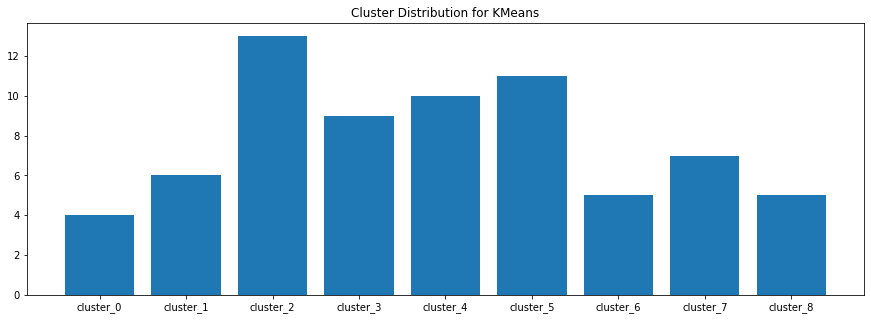

In [16]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["cluster_"+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

Pour bénéficier de partitionnement qu'on a fait, il est nécessaire de lister pour chaque cluster, les séries qui lui appartiennent.

In [17]:
namesofMySeries=sales.columns
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
groups = pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).\
    sort_values(by="Cluster").set_index("Cluster")
for cluster in sorted(set(fancy_names_for_labels)):
    print(cluster+':', \
          ', '.join(sorted(groups[groups.index == cluster]['Series'], \
                            key=lambda x: int(x.split('_')[1]))))

Cluster 0: P_18, P_37, P_65, P_67
Cluster 1: P_2, P_6, P_10, P_25, P_26, P_27
Cluster 2: P_11, P_12, P_14, P_41, P_42, P_43, P_44, P_45, P_46, P_47, P_48, P_49, P_50
Cluster 3: P_19, P_34, P_35, P_39, P_51, P_58, P_59, P_61, P_64
Cluster 4: P_15, P_17, P_22, P_32, P_36, P_60, P_62, P_63, P_66, P_70
Cluster 5: P_4, P_7, P_9, P_28, P_29, P_33, P_53, P_54, P_55, P_57, P_69
Cluster 6: P_13, P_16, P_20, P_30, P_40
Cluster 7: P_1, P_5, P_8, P_31, P_38, P_52, P_68
Cluster 8: P_3, P_21, P_23, P_24, P_56


On a selectionné le produit le plus proche du centroide de chaque cluster, autrement dit le plus proche aux autres produits au même groupe.

In [18]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, pca_res)
closest

array([36,  5, 46, 63, 21, 54, 29, 37, 23], dtype=int64)

Pour visualiser ce résultat, on a tracé l'ensemble des points ainsi que les centres des groupes (étoiles), le point le plus proche de chaque centre est présenté en gris.

In [19]:
plt.figure(figsize=(25,10))
plt.scatter(pca_res[:, 0], pca_res[:, 1], c=labels, s=300)
sc = plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], \
            marker='*', c=np.unique(labels), edgecolors='black', s=500)
plt.scatter(pca_res[closest, 0], pca_res[closest, 1], c='grey', \
            edgecolors=[sc.to_rgba(lab) for lab in np.unique(labels)], s=300)
for cluster_lab, cluster_x, cluster_y in \
zip(np.unique(labels), kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]):
    for pt_lab, pt_x, pt_y in zip(labels, pca_res[:, 0], pca_res[:, 1]):
        if cluster_lab==pt_lab:
            x, y = [cluster_x, pt_x], [cluster_y, pt_y]
            plt.plot(x, y, c=sc.to_rgba(cluster_lab), alpha=0.5)
plt.show()

pour re vérifier ces résultats, on peut voir que les séries choisis sont centrées pour chaque groupe. 

In [20]:
fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                if i not in closest :
                    axs[row_i, column_j].plot(mySeries[i], c="gray",alpha=0.4)
                else : 
                    axs[row_i, column_j].plot(mySeries[i],c="blue")
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        #axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red") 
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.show()

On a extrait les produits représentatifs des groupes et on a construit un nouveau jeu de données de séries temporelles sur lequel on va travailler par la suite.

In [21]:
sales_s = sales.iloc[:, sorted(closest)]
sales_s.head()

P_6   P_22  P_24   P_30  P_37  P_38  P_47  P_55  P_64
2014-07-31  2244  10467  7204  19852  1865  3510   510  3849  1039
2014-08-31  1970  11319  7477  19164  2043  3804   524  3980  1134
2014-09-30  1877  10956  7592  17382  2188  3859   595  3787  1160
2014-10-31  1615   9822  7435  16034  2297  3823   636  3745  1180
2014-11-30  1796  10427  7434  16430  2432  3535   572  3861  1065

count          mean          std      min      25%      50%      75%  \
P_6    63.0   3182.793651   668.663283   1615.0   2863.0   3176.0   3508.5   
P_22   63.0  13833.523810  2646.570080   9339.0  11800.0  13541.0  15096.5   
P_24   63.0  11114.365079  1667.354049   7204.0  10201.0  11284.0  12235.0   
P_30   63.0  19873.571429  3179.000090  14339.0  17350.5  19426.0  21268.5   
P_37   63.0   2912.920635   635.676000   1865.0   2296.5   2873.0   3335.5   
P_38   63.0   3731.333333   485.265142   2310.0   3481.0   3797.0   4012.5   
P_47   63.0    735.206349   147.854130    510.0    633.5    698.0    828.0   
P_55   63.0   6718.682540  1551.085778   3745.0   5570.0   6991.0   7946.5   
P_64   63.0   1409.571429   213.484888   1039.0   1231.5   1334.0   1607.5   

          max  
P_6    4733.0  
P_22  19889.0  
P_24  14105.0  
P_30  30048.0  
P_37   4273.0  
P_38   4586.0  
P_47   1222.0  
P_55   9120.0  
P_64   1817.0

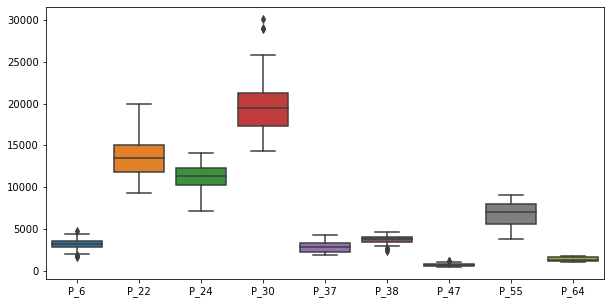

In [22]:
display(sales_s.describe().T)
plt.figure(figsize=(10,5))
sns.boxplot(data=sales_s)
plt.show()

Ce qu'on peut confimer graphiquement :

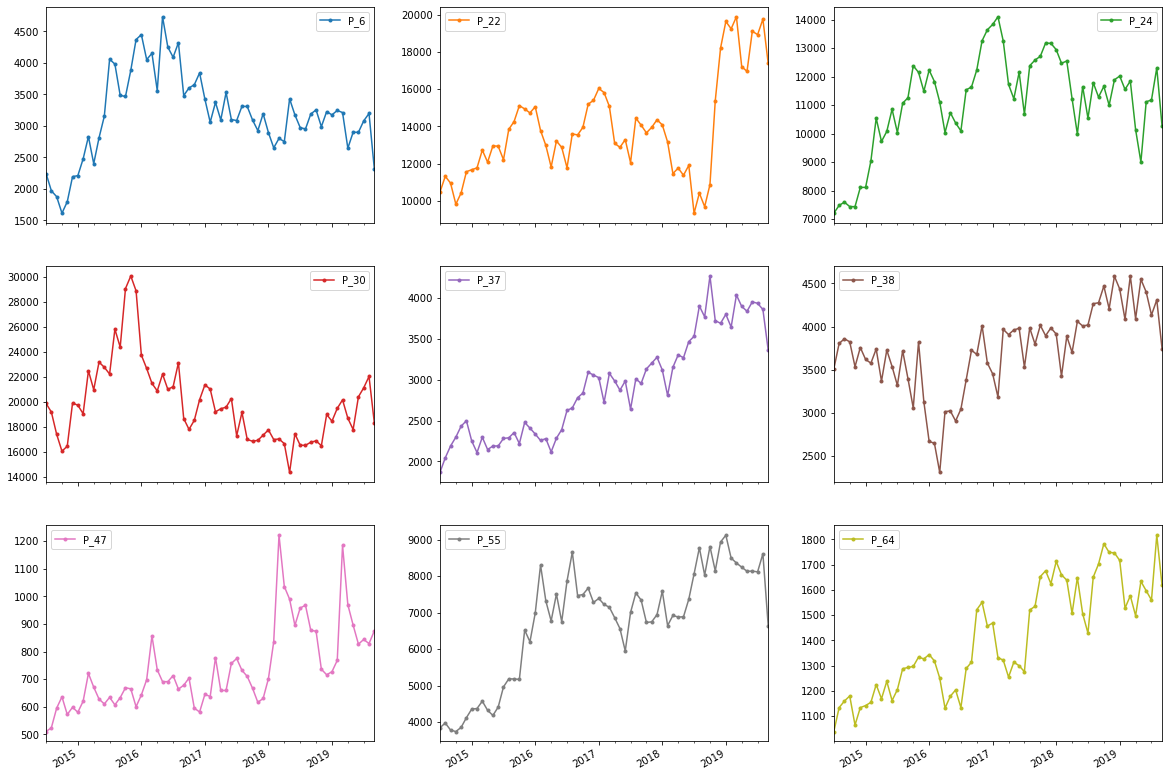

In [23]:
sales_s.plot(subplots=True,layout=(3,3),figsize=(20,15), marker='.')
plt.show()

## Moyenne mobile des séries

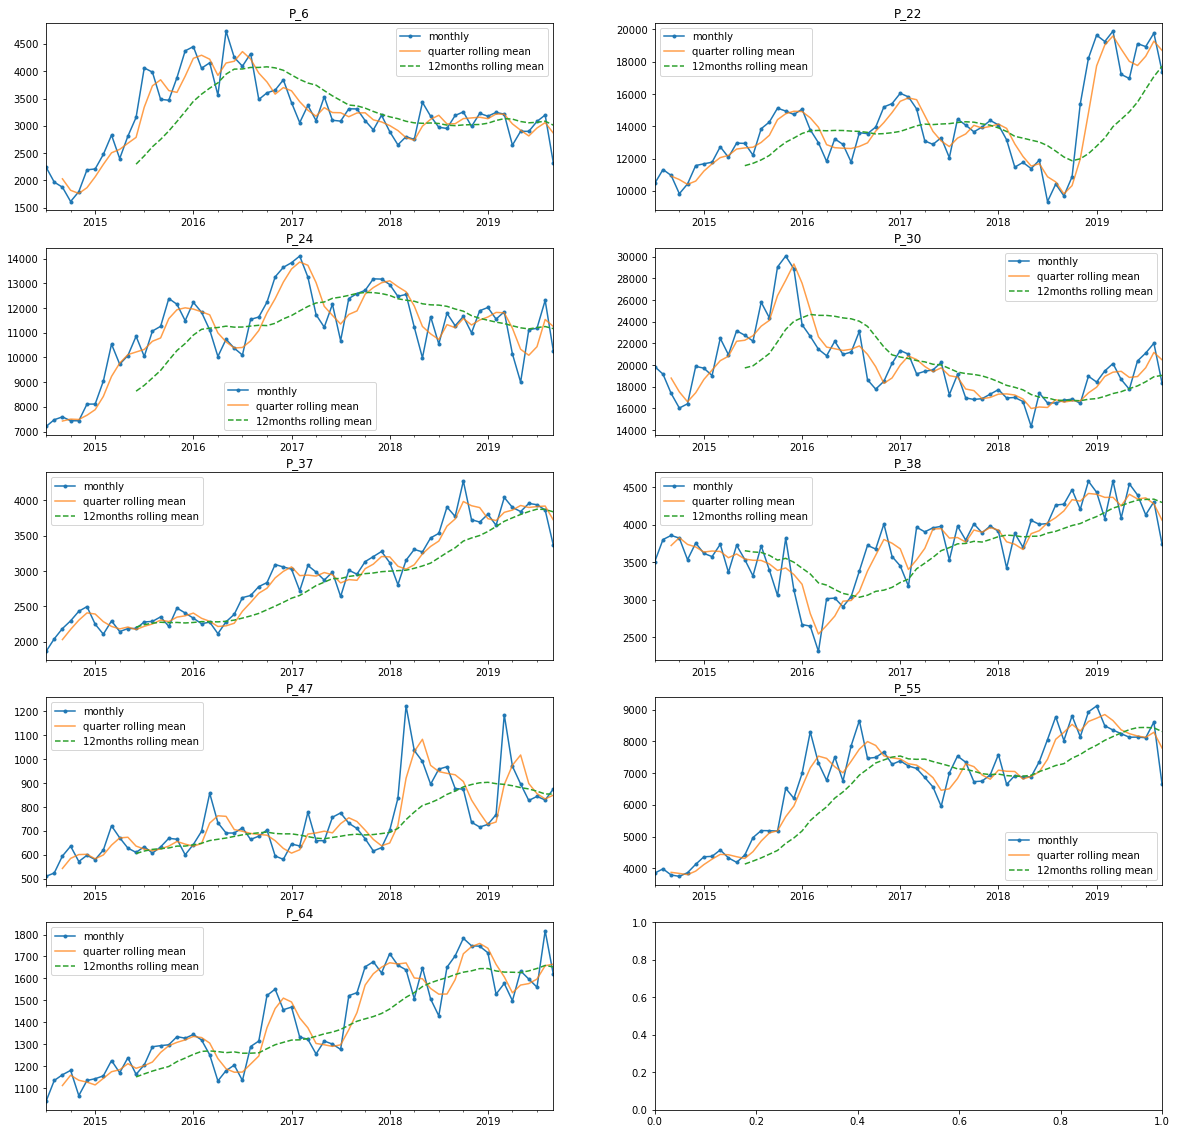

In [24]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
cols = [next(color_cycle), next(color_cycle), next(color_cycle)]
for i, item in enumerate(sales_s.columns):
    sales_s[item].plot(title=item,
                     color=cols[0],
                     ax=axs[i],
                     marker='.', label="monthly")
    sales_s[item].rolling(3).mean().plot(
                     color=cols[1],
                     ax=axs[i], label="quarter rolling mean", alpha=0.75)
    sales_s[item].rolling(12).mean().plot(
                     color=cols[2],
                     ax=axs[i], linestyle='--', label="12months rolling mean")
    axs[i].legend()

## visualisation de la saisonnalité

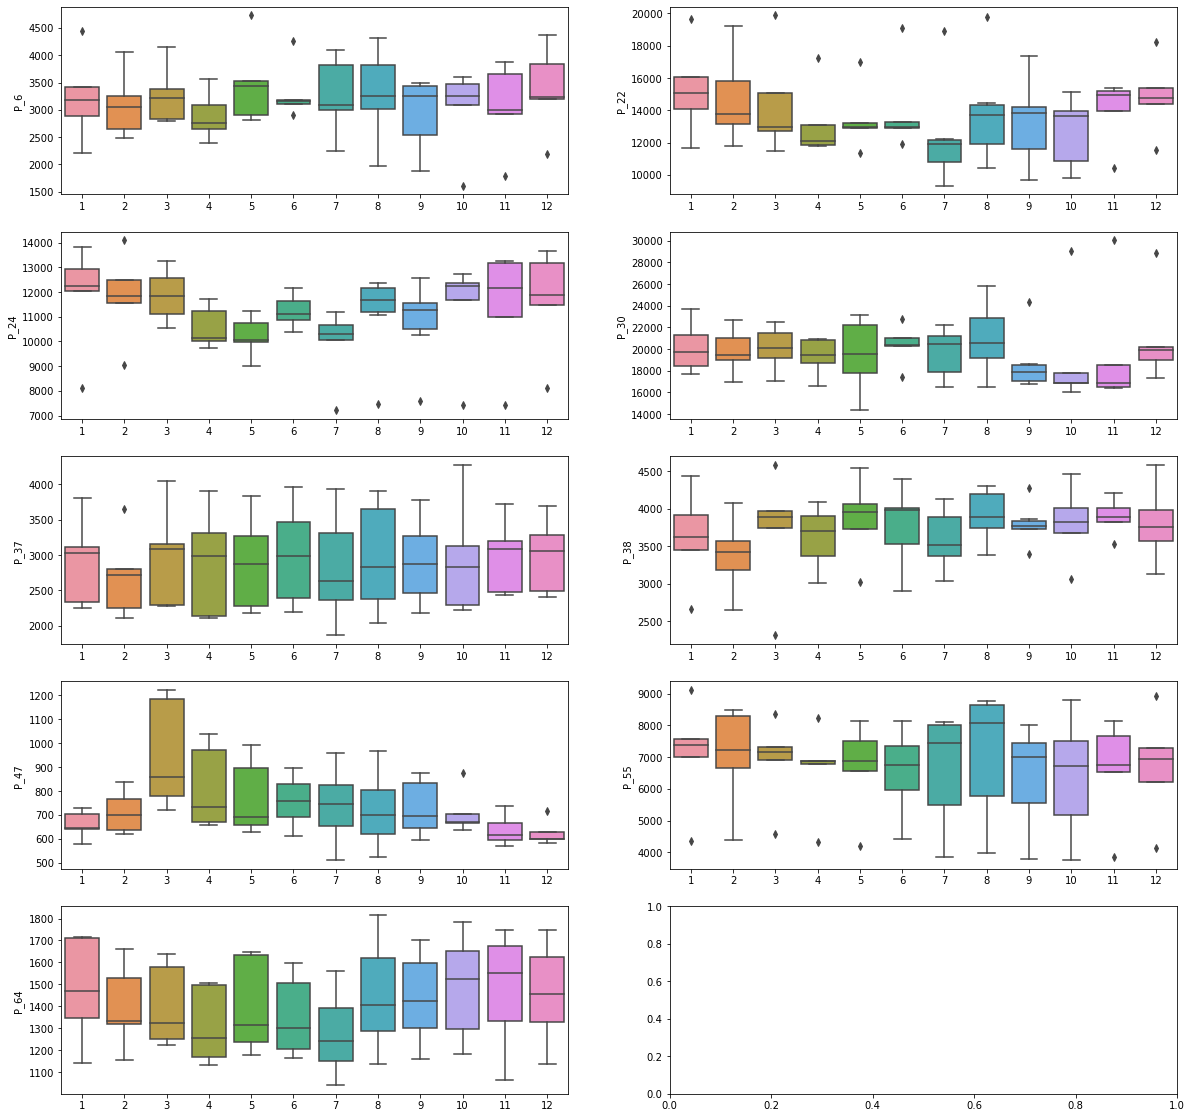

In [25]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes = axes.flatten()
for name, ax in zip(sales_s.columns, axes):
    sns.boxplot(data=sales_s, x=sales_s.index.month, y=name, ax=ax)

## Décomposition des séries

In [26]:
def plotseasonal(res, axes, name):
    res.observed.plot(ax=axes[0], legend=False, title=name)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False, marker='o', linestyle='', markersize=5)
    axes[3].set_ylabel('Residual')
    plotseasonal.counter += 1
def grid_plotseasonal(df, ncol):
    nrow=ceil(len(df.columns)/ncol)*4
    fig, axes = plt.subplots(ncols=ncol, nrows=nrow, sharex=True, figsize=(15,1.5*nrow))
    plotseasonal.counter, k = 0, 0
    for i,col in enumerate(df.columns):
        res = seasonal_decompose(df[col].dropna(), period=12, filt=None)
        plotseasonal(res, axes[k:k+4, i%ncol], col)
        if (i%ncol)==(ncol-1) : k+=4
    plt.tight_layout()
    plt.show()

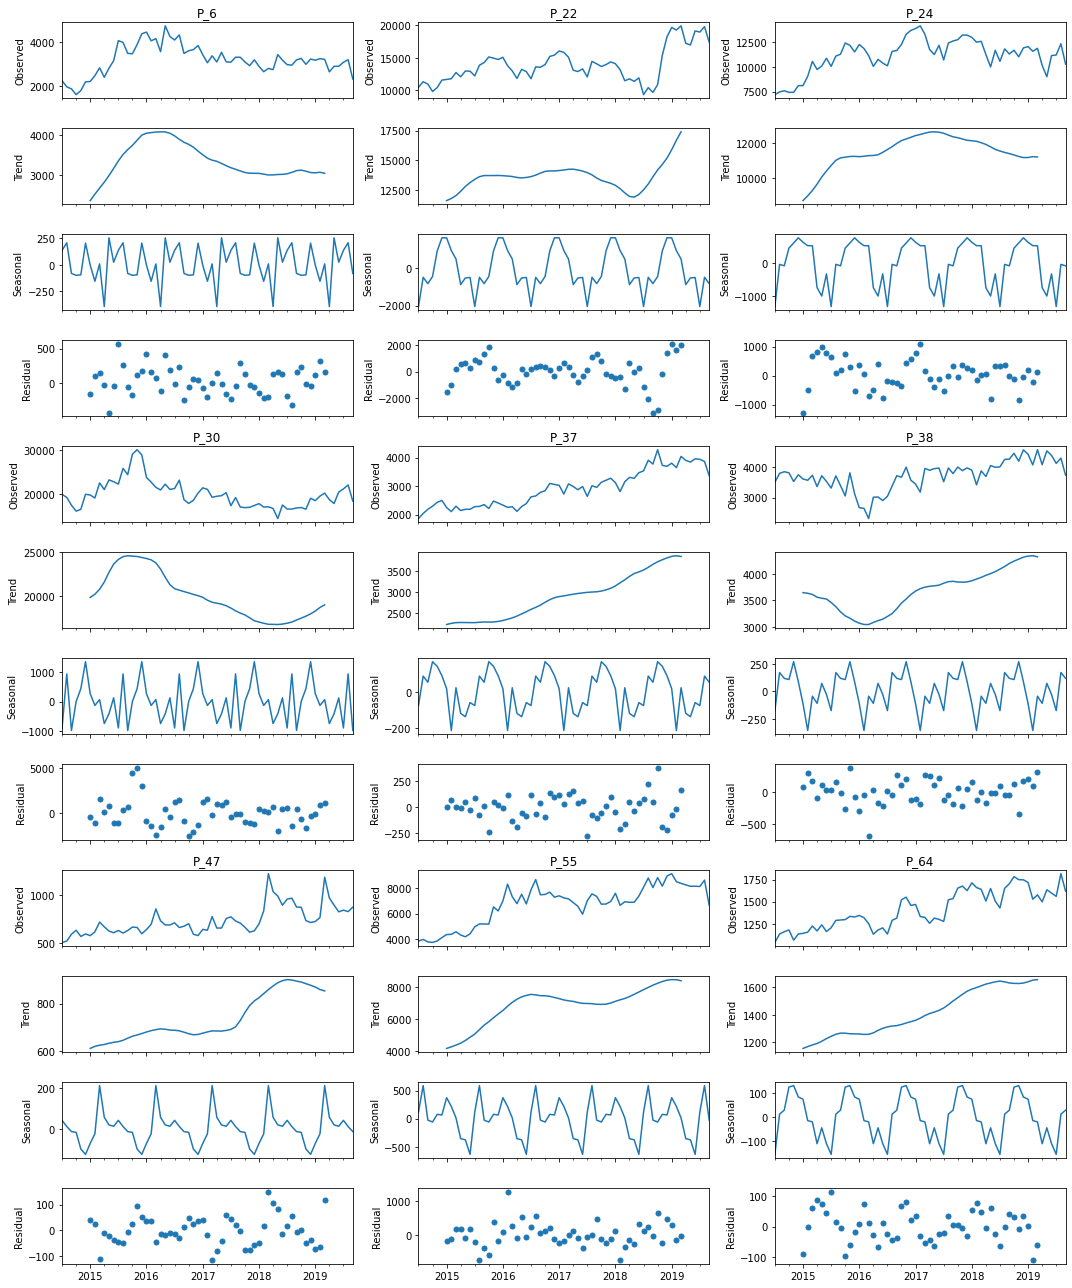

In [27]:
grid_plotseasonal(sales_s, ncol=3)

La fonction season_decompose peut être utilisée pour l'analyse des portions de chaque composant de la série chronologique. Ceci est particulièrement utile pour déterminer l'absorption des résidus dans les données, sur la base des données décomposées. Le volume de cette absorption implique la prévisibilité de la série chronologique - plus les résidus sont élevés, moins la prévisibilité. Dans une certaine mesure, la proportion des résidus par rapport à la tendance et à la saisonnalité peut également être illustrée par les graphiques des moyennes mobiles et des écarts-types ci-dessus.

In [28]:
d = pd.DataFrame(0, index=sales_s.columns, columns=["RESMEAN","OBSMEAN","PERC"], dtype=float)
for col in sales_s.columns:
    result = seasonal_decompose(sales_s[col], period=12, model='additive')
    res, obs = result.resid, result.observed
    d.loc[col][:2] = list(map(lambda x: np.mean(np.abs(x)), (res, obs[~np.isnan(res)])))
d.PERC = d.RESMEAN*100/d.OBSMEAN
d.round(2)

RESMEAN   OBSMEAN  PERC
P_6    161.56   3368.08  4.80
P_22   814.70  13678.31  5.96
P_24   398.92  11587.02  3.44
P_30  1130.08  20098.61  5.62
P_37    94.88   2888.78  3.28
P_38   150.17   3677.69  4.08
P_47    46.05    738.08  6.24
P_55   261.75   6902.75  3.79
P_64    41.16   1418.96  2.90

Un diagramme de décalage (lag plot) est un nuage de points pour une série chronologique et les mêmes données décalées. Avec un tel graphe, nous pouvons vérifier s'il existe une corrélation possible entre les ventes ce mois et le mois précédent.

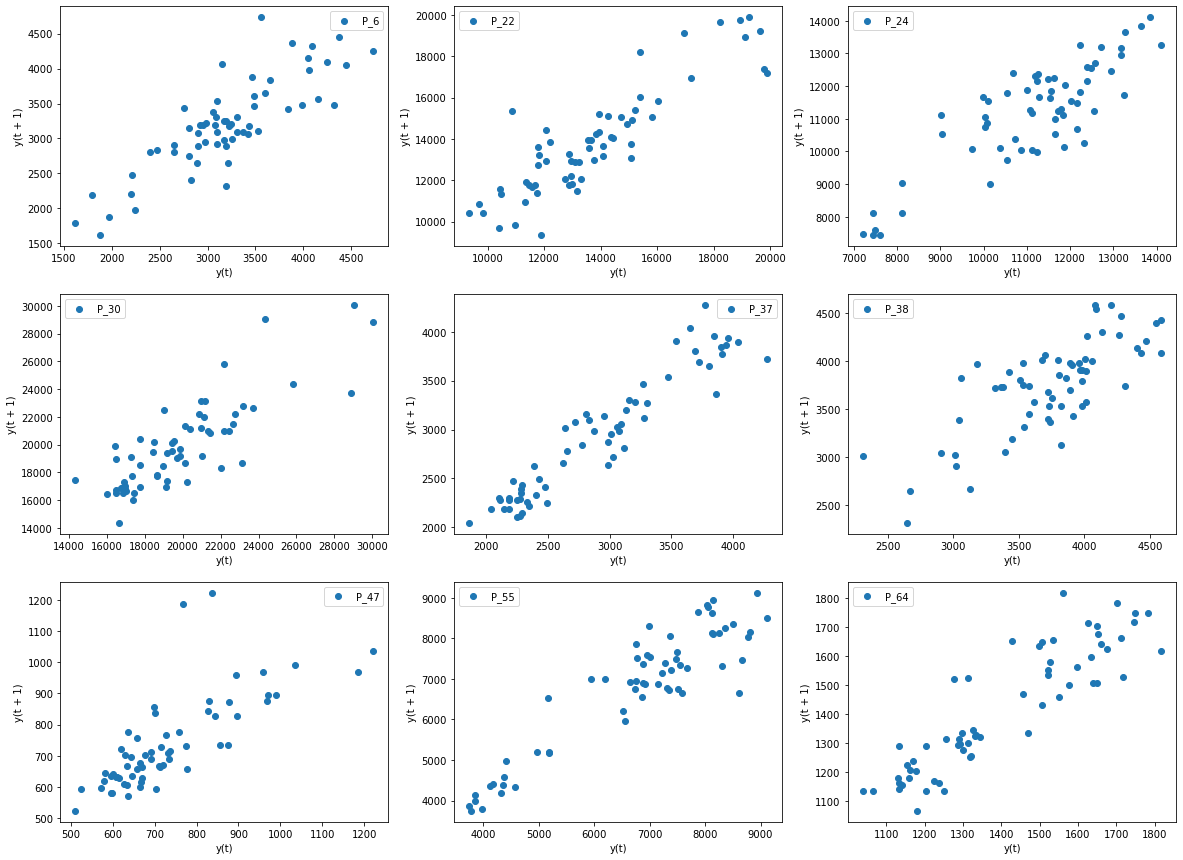

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()
for name, ax in zip(sales_s.columns, axes):
    lag_plot(sales_s[name], ax=ax, label=name)
    ax.legend()

## Analyse d'autocorrélation

L'analyse d'autocorrélation illustre le potentiel de prédiction des données de séries chronologiques. Les graphiques d'autocorrélation résument graphiquement la force d'une relation avec une observation dans une série chronologique avec des observations à des pas de temps antérieurs. Le coefficient de Pearson est utilisé pour mesurer l'autocorrélation. Ainsi, l'analyse suivante n'est pertinente que pour les données avec une distribution gaussienne normale.

Un tracé de l'autocorrélation d'une série chronologique par décalage est appelé la fonction d'autocorrélation (ACF). Ce graphique est parfois appelé corrélogramme ou graphique d'autocorrélation. Le graphique montre la valeur de décalage le long de l'axe des x et la corrélation sur l'axe des y entre -1 et 1. Les intervalles de confiance sont dessinés sous forme de cône. Par défaut, il est défini sur un intervalle de confiance de 95%, ce qui suggère que les valeurs de corrélation en dehors de ce code sont très probablement une corrélation.

En général, la corrélation «partielle» entre deux variables est la quantité de corrélation entre elles qui n'est pas expliquée par leurs corrélations mutuelles avec un ensemble spécifié d'autres variables. Par exemple, si nous régressons une variable Y sur d'autres variables X1, X2 et X3, la corrélation partielle entre Y et X3 est la quantité de corrélation entre Y et X3 qui n'est pas expliquée par leurs corrélations communes avec X1 et X2.

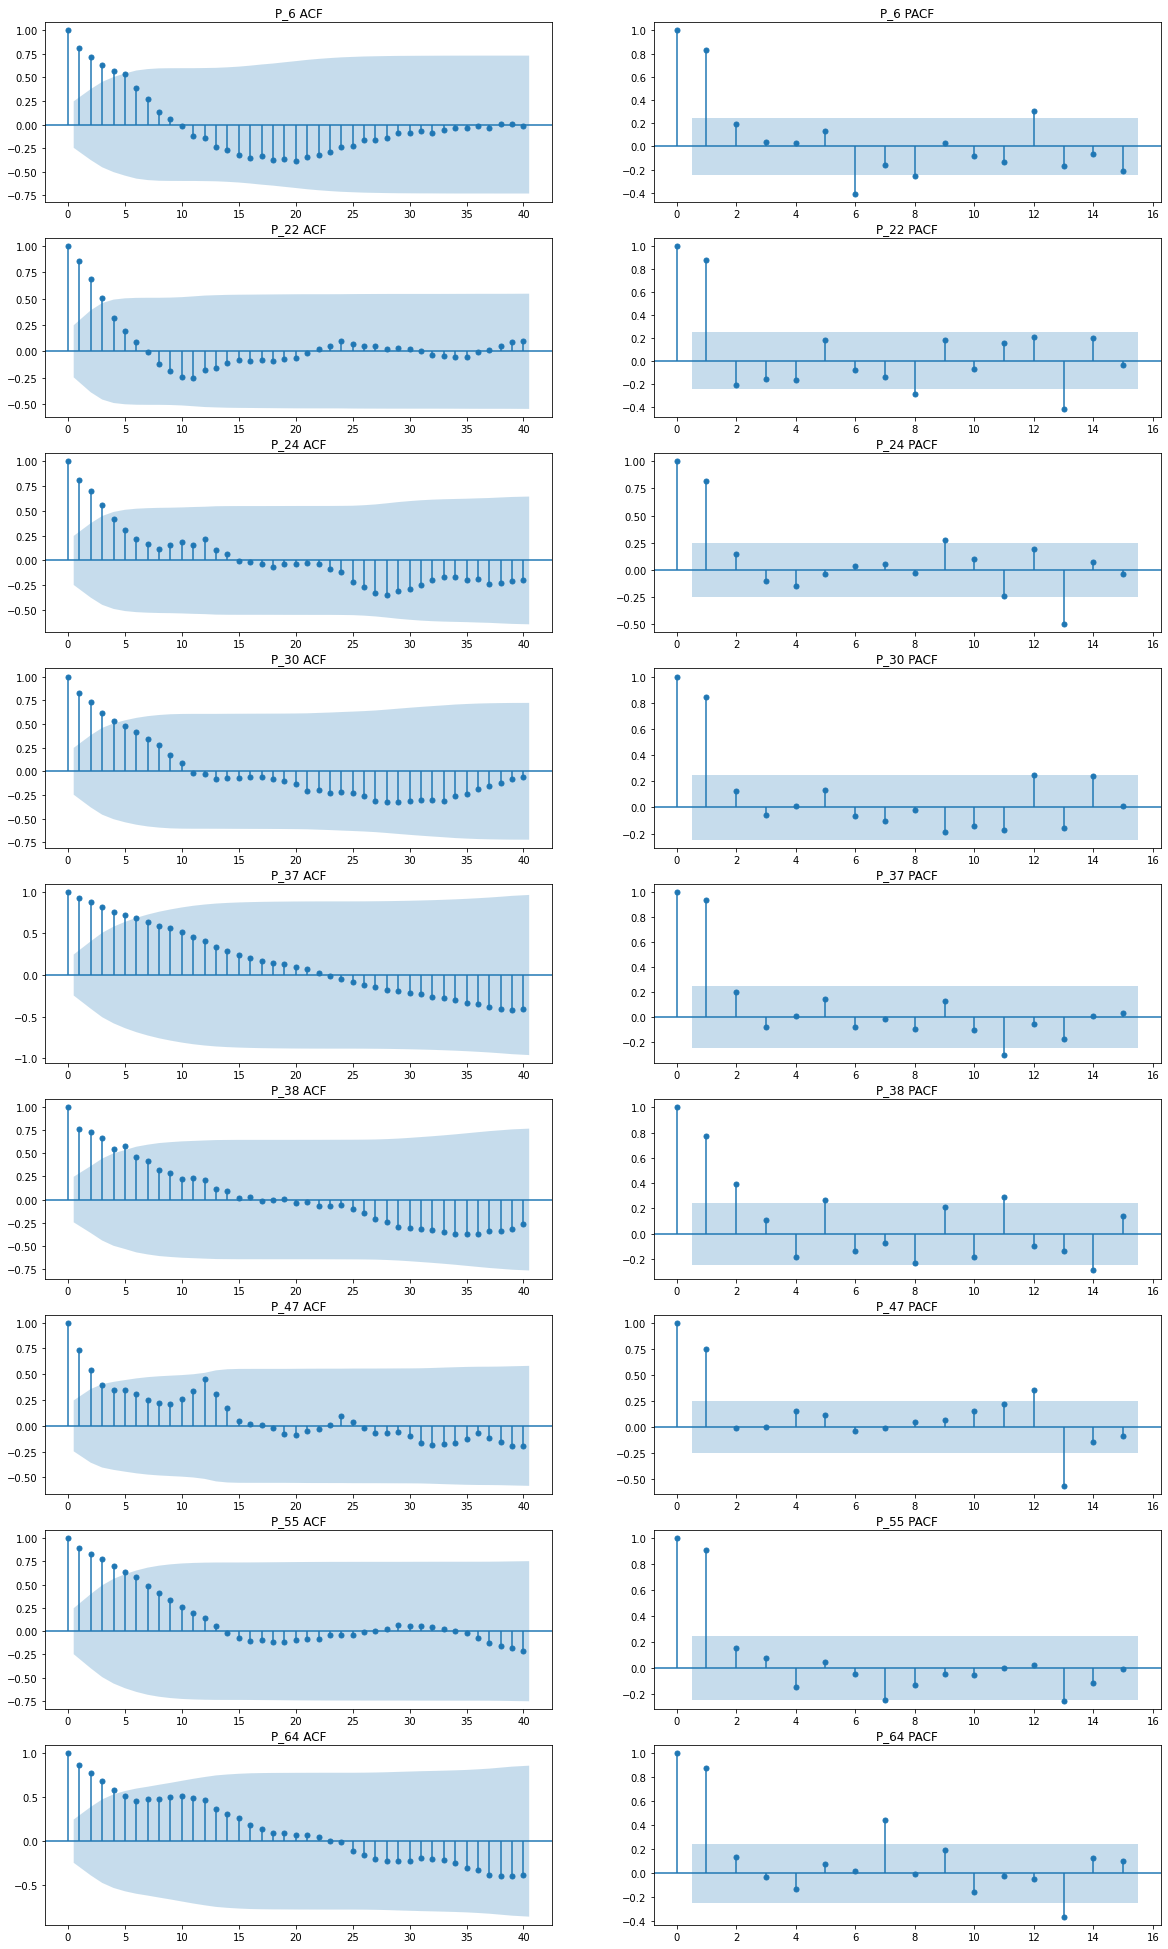

In [30]:
fig, axes = plt.subplots(9, 2, figsize=(20, 35), sharex=False)
alpha=.05
for i, col in enumerate(sales_s.columns):
    sm.graphics.tsa.plot_acf(sales_s[col].values.squeeze(), lags=40, ax=axes[i,0], title=f"{col} ACF", alpha=alpha)
    sm.graphics.tsa.plot_pacf(sales_s[col].values.squeeze(), lags=15, ax=axes[i,1], title=f"{col} PACF", alpha=alpha)

### Frome these resources : 

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://learn.co/lessons/dsc-3-25-09-time-series-decomposition

Le test Augmented Dickey-Fuller (ADF) est un type de test statistique appelé test de racine unitaire. Les racines unitaires sont une cause de non-stationnarité.

* Hypothèse nulle (H0): la série chronologique a une racine unitaire. (La série chronologique n'est pas stationnaire).

* Hypothèse alternative (H1): La série chronologique n'a pas de racine unitaire (la série chronologique est stationnaire).

Si l'hypothèse nulle peut être rejetée, nous pouvons conclure que la série chronologique est stationnaire.

Il existe deux façons de rejeter l'hypothèse nulle:

D'une part, l'hypothèse nulle peut être rejetée si la valeur p est inférieure à un niveau de signification défini. Le niveau de signification par défaut est de 5%

* <span style='color:Red'> **p_value > niveau de risque (par défaut: 0,05)** </span>: échec de rejet de l'hypothèse nulle (H0), les données ont une racine unitaire et ne sont pas stationnaires.

* <span style='color:Green'> **p-value <= niveau de signification (par défaut: 0,05)** </span>: Rejetez l'hypothèse nulle (H0), les données n'ont pas de racine unitaire et sont stationnaires.

En revanche, l'hypothèse nulle peut être rejetée si la statistique de test est inférieure à la valeur critique.

* <span style='color:Red'> **Statistique ADF> valeur critique** </span>: échec de rejet de l'hypothèse nulle (H0), les données ont une racine unitaire et sont <span style='color:Red'> non-stationnaires </span>.
* <span style='color:Green'> **Statistique ADF <valeur critique** </span>: Rejetez l'hypothèse nulle (H0), les données n'ont pas de racine unitaire et sont <span style='color:Green'> stationnaires </span>.

In [31]:
# pd.DataFrame(zip(sales_s.columns, \
#                  *[[adfuller(sales_s[i], regression='ct', autolag='AIC')[j] for i in sales_s.columns] \
#                    for j in range(4)], \
#                  *[[[adfuller(sales_s[i], regression='ct', autolag='AIC')[4] for i in sales_s.columns][i][risk] \
#                     for i in range(9)] for risk in ('1%', '5%', '10%')]), \
#              columns=["Series", "Test statistic", "P-value", "Lags Used", "Observations Used", "1%", "5%", "10%"]).set_index("Series")

In [32]:
# salma code
# res = pd.DataFrame(columns=['Test statistic', 'p-value', 'lag used','Number of Observations Used','1%','5%','10%'])

# for col in  sales_s.columns:
#     dftest = adfuller(sales_s[col], regression='ct', autolag='AIC')
#     res = res.append({'Test statistic':dftest[0], 'p-value':dftest[1],'lag used':int(dftest[2]),\
#                       'Number of Observations Used':int(dftest[3]),'1%':dftest[4]['1%'],'5%':dftest[4]['5%'],\
#                       '10%':dftest[4]['10%']},ignore_index=True)
# res.round(3)
# res.iloc[:, 2] = res.iloc[:, 2].astype(int)
# res.iloc[:, 3] = res.iloc[:, 3].astype(int)
# res.set_index(sales_s.columns)

In [33]:
sales_s["P_6"]

2014-07-31    2244
2014-08-31    1970
2014-09-30    1877
2014-10-31    1615
2014-11-30    1796
              ... 
2019-05-31    2900
2019-06-30    2899
2019-07-31    3081
2019-08-31    3198
2019-09-30    2322
Name: P_6, Length: 63, dtype: int64

In [34]:
# from arch.unitroot import ADF

# adf = ADF(sales_s["P_6"])
# print(adf.summary().as_text())

In [35]:
res = pd.DataFrame(sales_s.columns, columns=["Series"])
res[1], res[2], res[3], res[4], res[5] = [[adfuller(sales_s[i], regression='c', autolag='AIC')[j]\
                                           for i in sales_s.columns] for j in range(5)]
res[5], res[6], res[7] = [[res[5][i][risk] for i in range(len(sales_s.columns))] for risk in ('1%', '5%', '10%')]
res=res.set_index("Series")
res[8] = (res.iloc[:,0] < res.iloc[:,4]).astype(int)+ (res.iloc[:,0] < res.iloc[:,5])+ (res.iloc[:,0] < res.iloc[:,6])
res[8] = ["Stationaire avec 90% de confiance" if x == 1 else "Stationaire avec 95% de confiance" \
          if x == 2 else "Stationaire avec 99% de confiance" if x == 3 else "Non stationnaire" for x in res[8]]
res.columns = ["Test statistic", "P-value", "Lags Used", "Observations Used", "1%", "5%", "10%", "Conclusion"]
res

Test statistic   P-value  Lags Used  Observations Used        1%  \
Series                                                                     
P_6          -1.642907  0.460742         11                 51 -3.565624   
P_22         -3.137132  0.023925          7                 55 -3.555273   
P_24         -2.893762  0.046078          0                 62 -3.540523   
P_30         -2.313024  0.167802          0                 62 -3.540523   
P_37         -1.278226  0.639074          1                 61 -3.542413   
P_38         -1.728611  0.416435          1                 61 -3.542413   
P_47         -3.011219  0.033860          0                 62 -3.540523   
P_55         -1.936396  0.315137          1                 61 -3.542413   
P_64         -0.869785  0.797760          8                 54 -3.557709   

              5%       10%                         Conclusion  
Series                                                         
P_6    -2.920142 -2.598015                   Non stationnaire  
P_22   -2.915731 -2.595670  Stationaire avec 95% de confiance  
P_24   -2.909427 -2.592314  Stationaire avec 90% de confiance  
P_30   -2.909427 -2.592314                   Non stationnaire  
P_37   -2.910236 -2.592745                   Non stationnaire  
P_38   -2.910236 -2.592745                   Non stationnaire  
P_47   -2.909427 -2.592314  Stationaire avec 95% de confiance  
P_55   -2.910236 -2.592745                   Non stationnaire  
P_64   -2.916770 -2.596222                   Non stationnaire

In [36]:
def highlight_greater(x):
    r, g = 'red', 'green'
    m1 = x['Test statistic'] > x['1%']
    m2 = x['Test statistic'] > x['5%']
    m3 = x['Test statistic'] > x['10%']
    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df1['1%'] = np.where(m1, f'background-color: {r}', df1['1%'])
    df1['5%'] = np.where(m2, f'background-color: {r}', df1['5%'])
    df1['10%'] = np.where(m3, f'background-color: {r}', df1['10%'])
    df1['1%'] = np.where(~m1, f'background-color: {g}', df1['1%'])
    df1['5%'] = np.where(~m2, f'background-color: {g}', df1['5%'])
    df1['10%'] = np.where(~m3, f'background-color: {g}', df1['10%'])
    return df1
res.style.apply(highlight_greater, axis=None)

In [37]:
test = sales_s.diff(1).iloc[1:]
test = test.loc[:,["P_6", "P_24", "P_30", "P_38", "P_55", "P_64"]]
# test

In [38]:
res = pd.DataFrame(test.columns, columns=["Series"])
res[1], res[2], res[3], res[4], res[5] = [[adfuller(test[i], regression='nc', autolag='AIC')[j]\
                                           for i in test.columns] for j in range(5)]
res[5], res[6], res[7] = [[res[5][i][risk] for i in range(len(test.columns))] for risk in ('1%', '5%', '10%')]
res=res.set_index("Series")
res[8] = (res.iloc[:,0] < res.iloc[:,4]).astype(int)+ (res.iloc[:,0] < res.iloc[:,5])+ (res.iloc[:,0] < res.iloc[:,6])
res[8] = ["Stationaire avec 90% de confiance" if x == 1 else "Stationaire avec 95% de confiance" \
          if x == 2 else "Stationaire avec 99% de confiance" if x == 3 else "Non stationnaire" for x in res[8]]
res.columns = ["Test statistic", "P-value", "Lags Used", "Observations Used", "1%", "5%", "10%", "Conclusion"]
res.style.apply(highlight_greater, axis=None)

In [39]:
test2 = sales_s.diff(12).iloc[12:]
test2 = test2.loc[:,["P_24", "P_64"]]
# test2.plot(subplots=True)

In [40]:
res = pd.DataFrame(test2.columns, columns=["Series"])
res[1], res[2], res[3], res[4], res[5] = [[adfuller(test2[i], regression='nc', autolag='AIC')[j]\
                                           for i in test2.columns] for j in range(5)]
res[5], res[6], res[7] = [[res[5][i][risk] for i in range(len(test2.columns))] for risk in ('1%', '5%', '10%')]
res=res.set_index("Series")
res[8] = (res.iloc[:,0] < res.iloc[:,4]).astype(int)+ (res.iloc[:,0] < res.iloc[:,5])+ (res.iloc[:,0] < res.iloc[:,6])
res[8] = ["Stationaire avec 90% de confiance" if x == 1 else "Stationaire avec 95% de confiance" \
          if x == 2 else "Stationaire avec 99% de confiance" if x == 3 else "Non stationnaire" for x in res[8]]
res.columns = ["Test statistic", "P-value", "Lags Used", "Observations Used", "1%", "5%", "10%", "Conclusion"]
res.style.apply(highlight_greater, axis=None)

In [41]:
sales_s.index

DatetimeIndex(['2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28',
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
      

In [42]:
sales_s_p64 = sales_s[['P_64']]
sales_s_p64

P_64
2014-07-31  1039
2014-08-31  1134
2014-09-30  1160
2014-10-31  1180
2014-11-30  1065
...          ...
2019-05-31  1634
2019-06-30  1597
2019-07-31  1560
2019-08-31  1817
2019-09-30  1618

[63 rows x 1 columns]

In [43]:
sales_s_p64['year'] = sales_s_p64.index.year
sales_s_p64['month'] = sales_s_p64.index.month
sales_s_p64['quarter'] = sales_s_p64.index.quarter
sales_s_p64

<ipython-input-43-93c976de6b8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_s_p64['year'] = sales_s_p64.index.year
<ipython-input-43-93c976de6b8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_s_p64['month'] = sales_s_p64.index.month
<ipython-input-43-93c976de6b8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

P_64  year  month  quarter
2014-07-31  1039  2014      7        3
2014-08-31  1134  2014      8        3
2014-09-30  1160  2014      9        3
2014-10-31  1180  2014     10        4
2014-11-30  1065  2014     11        4
...          ...   ...    ...      ...
2019-05-31  1634  2019      5        2
2019-06-30  1597  2019      6        2
2019-07-31  1560  2019      7        3
2019-08-31  1817  2019      8        3
2019-09-30  1618  2019      9        3

[63 rows x 4 columns]

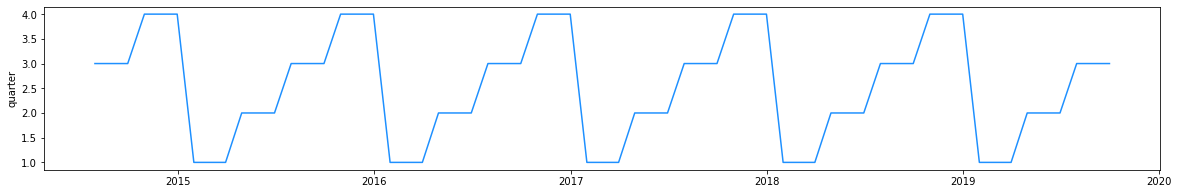

In [44]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=sales_s_p64.index, y=sales_s_p64['quarter'], color='dodgerblue')
# ax.set_xlim([date(2014, 7, 31), date(2019, 9, 30)])
plt.show()

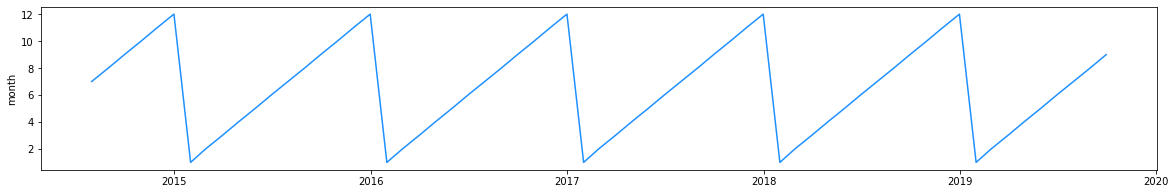

In [45]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=sales_s_p64.index, y=sales_s_p64['month'], color='dodgerblue')
# ax.set_xlim([date(2014, 7, 31), date(2019, 9, 30)])
plt.show()

<ipython-input-46-71a3e500bd73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_s_p64['month_sin'] = np.sin(2*np.pi*sales_s_p64['month']/month_in_year)
<ipython-input-46-71a3e500bd73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_s_p64['month_cos'] = np.cos(2*np.pi*sales_s_p64['month']/month_in_year)


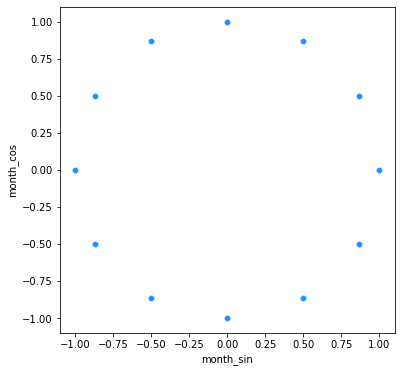

In [46]:
month_in_year = 12
sales_s_p64['month_sin'] = np.sin(2*np.pi*sales_s_p64['month']/month_in_year)
sales_s_p64['month_cos'] = np.cos(2*np.pi*sales_s_p64['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=sales_s_p64.month_sin, y=sales_s_p64.month_cos, color='dodgerblue')
plt.show()

In [47]:
sales_s_p64

P_64  year  month  quarter     month_sin     month_cos
2014-07-31  1039  2014      7        3 -5.000000e-01 -8.660254e-01
2014-08-31  1134  2014      8        3 -8.660254e-01 -5.000000e-01
2014-09-30  1160  2014      9        3 -1.000000e+00 -1.836970e-16
2014-10-31  1180  2014     10        4 -8.660254e-01  5.000000e-01
2014-11-30  1065  2014     11        4 -5.000000e-01  8.660254e-01
...          ...   ...    ...      ...           ...           ...
2019-05-31  1634  2019      5        2  5.000000e-01 -8.660254e-01
2019-06-30  1597  2019      6        2  1.224647e-16 -1.000000e+00
2019-07-31  1560  2019      7        3 -5.000000e-01 -8.660254e-01
2019-08-31  1817  2019      8        3 -8.660254e-01 -5.000000e-01
2019-09-30  1618  2019      9        3 -1.000000e+00 -1.836970e-16

[63 rows x 6 columns]

<ipython-input-48-6d6acf2eb8a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_s_p64['quarter_sin'] = np.sin(2*np.pi*sales_s_p64['quarter']/month_quarter)
<ipython-input-48-6d6acf2eb8a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_s_p64['quarter_cos'] = np.cos(2*np.pi*sales_s_p64['quarter']/month_quarter)


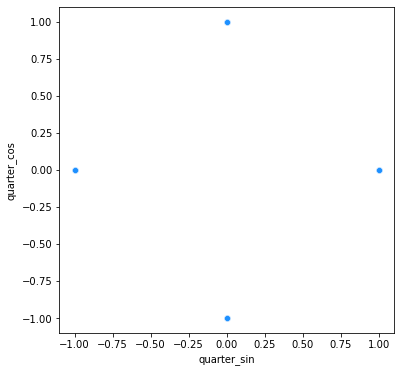

In [48]:
month_quarter =4
sales_s_p64['quarter_sin'] = np.sin(2*np.pi*sales_s_p64['quarter']/month_quarter)
sales_s_p64['quarter_cos'] = np.cos(2*np.pi*sales_s_p64['quarter']/month_quarter)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=sales_s_p64.quarter_sin, y=sales_s_p64.quarter_cos, color='dodgerblue')
plt.show()

In [49]:
sales_s_p64['lag1'] = sales_s_p64.P_64.shift(1)
sales_s_p64['lag2'] = sales_s_p64.P_64.shift(2)
sales_s_p64['lag3'] = sales_s_p64.P_64.shift(3)
sales_s_p64['lag4'] = sales_s_p64.P_64.shift(4)

<AxesSubplot:>

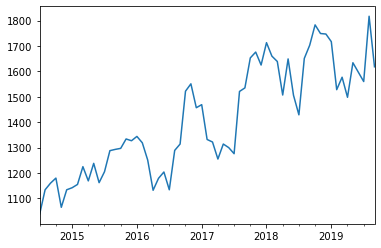

In [50]:
sales_s_p64.P_64.plot()

In [51]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

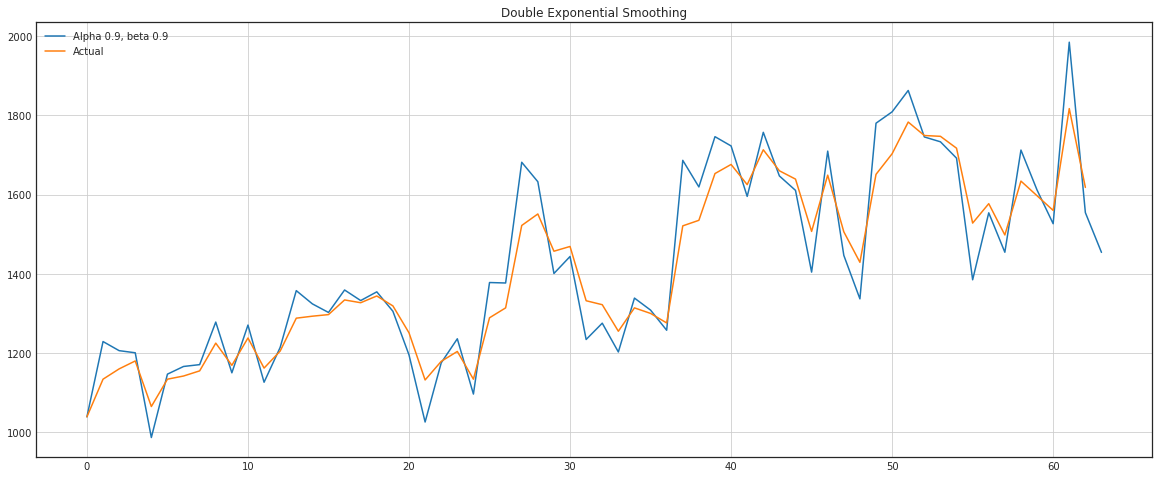

In [52]:
plotDoubleExponentialSmoothing(sales_s.P_64, alphas=[0.9], betas=[0.9])


Text(0.5, 1.0, 'Double Exponential Smoothing')

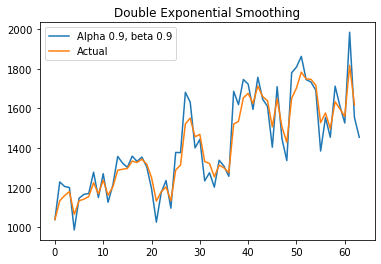

In [53]:
double_exp_P64 = double_exponential_smoothing(sales_s.P_64, alpha=0.9, beta=0.9)
plt.plot(double_exp_P64, label="Alpha {}, beta {}".format(0.9, 0.9))
plt.plot(sales_s.P_64.values, label = "Actual")
plt.legend(loc="best")
plt.axis('tight')
plt.title("Double Exponential Smoothing")

In [54]:
# sales_s_p64['double_exp_P64']=double_exp_P64[:-1]

In [55]:
sales_s_p64

P_64  year  month  quarter     month_sin     month_cos  \
2014-07-31  1039  2014      7        3 -5.000000e-01 -8.660254e-01   
2014-08-31  1134  2014      8        3 -8.660254e-01 -5.000000e-01   
2014-09-30  1160  2014      9        3 -1.000000e+00 -1.836970e-16   
2014-10-31  1180  2014     10        4 -8.660254e-01  5.000000e-01   
2014-11-30  1065  2014     11        4 -5.000000e-01  8.660254e-01   
...          ...   ...    ...      ...           ...           ...   
2019-05-31  1634  2019      5        2  5.000000e-01 -8.660254e-01   
2019-06-30  1597  2019      6        2  1.224647e-16 -1.000000e+00   
2019-07-31  1560  2019      7        3 -5.000000e-01 -8.660254e-01   
2019-08-31  1817  2019      8        3 -8.660254e-01 -5.000000e-01   
2019-09-30  1618  2019      9        3 -1.000000e+00 -1.836970e-16   

             quarter_sin   quarter_cos    lag1    lag2    lag3    lag4  
2014-07-31 -1.000000e+00 -1.836970e-16     NaN     NaN     NaN     NaN  
2014-08-31 -1.000000e+00 -1.836970e-16  1039.0     NaN     NaN     NaN  
2014-09-30 -1.000000e+00 -1.836970e-16  1134.0  1039.0     NaN     NaN  
2014-10-31 -2.449294e-16  1.000000e+00  1160.0  1134.0  1039.0     NaN  
2014-11-30 -2.449294e-16  1.000000e+00  1180.0  1160.0  1134.0  1039.0  
...                  ...           ...     ...     ...     ...     ...  
2019-05-31  1.224647e-16 -1.000000e+00  1498.0  1577.0  1528.0  1717.0  
2019-06-30  1.224647e-16 -1.000000e+00  1634.0  1498.0  1577.0  1528.0  
2019-07-31 -1.000000e+00 -1.836970e-16  1597.0  1634.0  1498.0  1577.0  
2019-08-31 -1.000000e+00 -1.836970e-16  1560.0  1597.0  1634.0  1498.0  
2019-09-30 -1.000000e+00 -1.836970e-16  1817.0  1560.0  1597.0  1634.0  

[63 rows x 12 columns]

In [56]:
sales_s_p64[['P_64']]

P_64
2014-07-31  1039
2014-08-31  1134
2014-09-30  1160
2014-10-31  1180
2014-11-30  1065
...          ...
2019-05-31  1634
2019-06-30  1597
2019-07-31  1560
2019-08-31  1817
2019-09-30  1618

[63 rows x 1 columns]

In [57]:
data = pd.DataFrame(sales_s_p64[['P_64', 'lag1', 'lag2', 'lag3', 'lag4']])
for i in range(5, 13):
    data[f"lag{i}"] = data.P_64.shift(i)

In [58]:
data

P_64    lag1    lag2    lag3    lag4    lag5    lag6    lag7  \
2014-07-31  1039     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2014-08-31  1134  1039.0     NaN     NaN     NaN     NaN     NaN     NaN   
2014-09-30  1160  1134.0  1039.0     NaN     NaN     NaN     NaN     NaN   
2014-10-31  1180  1160.0  1134.0  1039.0     NaN     NaN     NaN     NaN   
2014-11-30  1065  1180.0  1160.0  1134.0  1039.0     NaN     NaN     NaN   
...          ...     ...     ...     ...     ...     ...     ...     ...   
2019-05-31  1634  1498.0  1577.0  1528.0  1717.0  1747.0  1749.0  1783.0   
2019-06-30  1597  1634.0  1498.0  1577.0  1528.0  1717.0  1747.0  1749.0   
2019-07-31  1560  1597.0  1634.0  1498.0  1577.0  1528.0  1717.0  1747.0   
2019-08-31  1817  1560.0  1597.0  1634.0  1498.0  1577.0  1528.0  1717.0   
2019-09-30  1618  1817.0  1560.0  1597.0  1634.0  1498.0  1577.0  1528.0   

              lag8    lag9   lag10   lag11   lag12  
2014-07-31     NaN     NaN     NaN     NaN     NaN  
2014-08-31     NaN     NaN     NaN     NaN     NaN  
2014-09-30     NaN     NaN     NaN     NaN     NaN  
2014-10-31     NaN     NaN     NaN     NaN     NaN  
2014-11-30     NaN     NaN     NaN     NaN     NaN  
...            ...     ...     ...     ...     ...  
2019-05-31  1703.0  1651.0  1429.0  1506.0  1649.0  
2019-06-30  1783.0  1703.0  1651.0  1429.0  1506.0  
2019-07-31  1749.0  1783.0  1703.0  1651.0  1429.0  
2019-08-31  1747.0  1749.0  1783.0  1703.0  1651.0  
2019-09-30  1717.0  1747.0  1749.0  1783.0  1703.0  

[63 rows x 13 columns]

In [59]:
from sklearn.model_selection import TimeSeriesSplit

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [61]:
y = sales_s_p64.P_64
y

2014-07-31    1039
2014-08-31    1134
2014-09-30    1160
2014-10-31    1180
2014-11-30    1065
              ... 
2019-05-31    1634
2019-06-30    1597
2019-07-31    1560
2019-08-31    1817
2019-09-30    1618
Name: P_64, Length: 63, dtype: int64

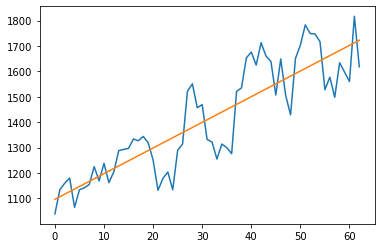

In [62]:
y = sales_s_p64.P_64
lr = LinearRegression()
t = np.array([i for i in range(len(y))])
t = np.reshape(t, (len(t), 1))
y = y.values
lr.fit(t, y)
trend = lr.predict(t)
plt.plot(y)
plt.plot(trend)

In [63]:

# Perform the Dickey Fuller Test
dftest = adfuller(y-trend, regression='nc', autolag='AIC')
# Print Dickey-Fuller test results
print ('Results of Dickey-Fuller Test:')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                 -2.550376
p-value                         0.010414
#Lags Used                      6.000000
Number of Observations Used    56.000000
Critical Value (1%)            -2.606822
Critical Value (5%)            -1.946692
Critical Value (10%)           -1.612798
dtype: float64


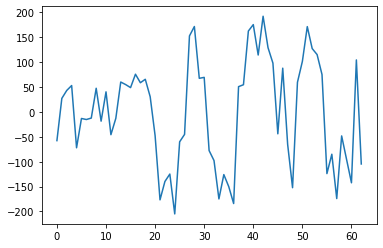

In [64]:
plt.plot(y-trend)

In [65]:
test = [i**2-i + 6 for i in range(100)]

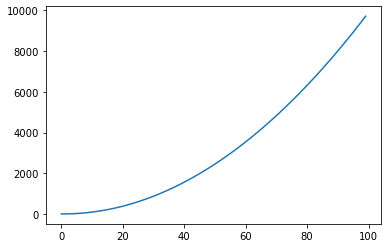

In [66]:
plt.plot(test)

<AxesSubplot:>

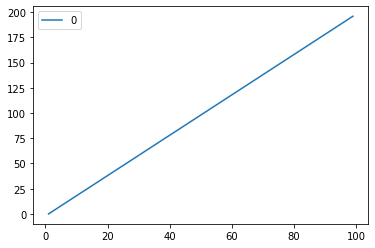

In [67]:
pd.DataFrame(test).diff(1).plot()

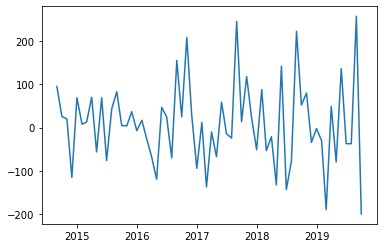

In [68]:
plt.plot(sales_s_p64.P_64.diff(1))

In [69]:
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

intercept: 1096.6071428571431
slope: [10.09562212]


In [70]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [71]:
y = data.dropna().P_64
X = data.dropna().drop(['P_64'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [72]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

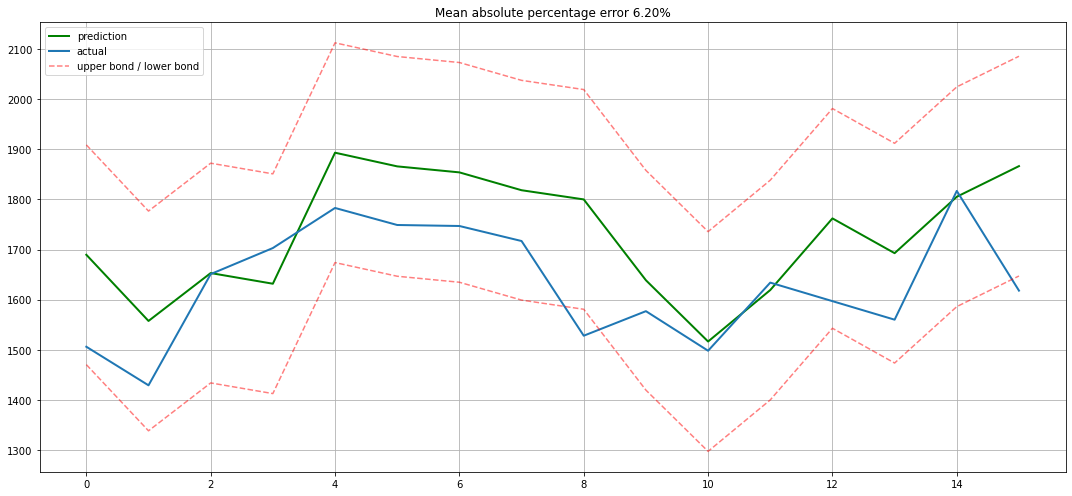

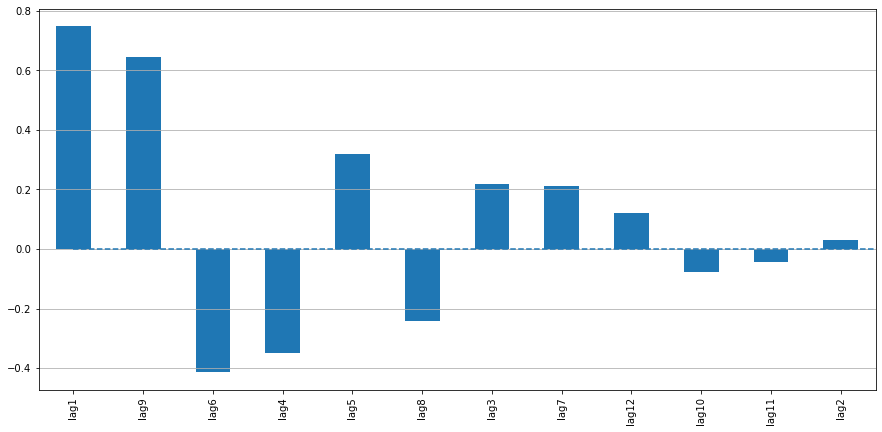

In [74]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

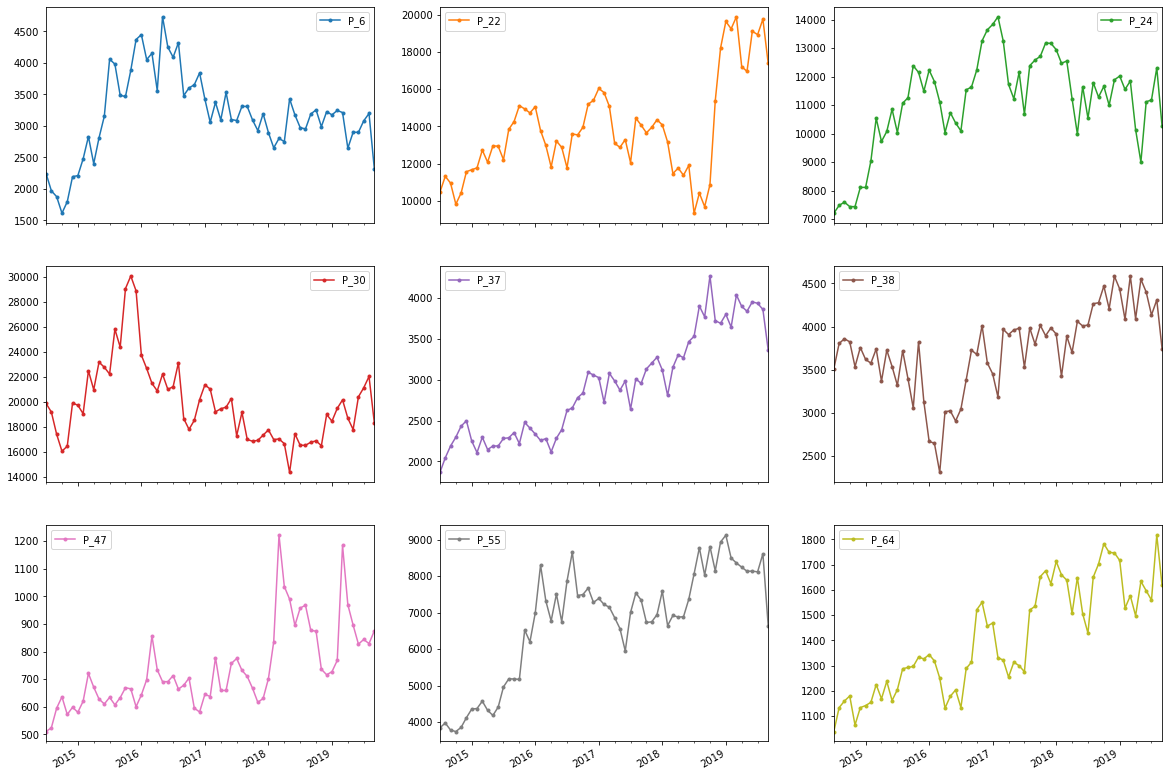

In [75]:
sales_s.plot(subplots=True,layout=(3,3),figsize=(20,15), marker='.')
plt.show()

In [76]:
sales_s.head()

P_6   P_22  P_24   P_30  P_37  P_38  P_47  P_55  P_64
2014-07-31  2244  10467  7204  19852  1865  3510   510  3849  1039
2014-08-31  1970  11319  7477  19164  2043  3804   524  3980  1134
2014-09-30  1877  10956  7592  17382  2188  3859   595  3787  1160
2014-10-31  1615   9822  7435  16034  2297  3823   636  3745  1180
2014-11-30  1796  10427  7434  16430  2432  3535   572  3861  1065

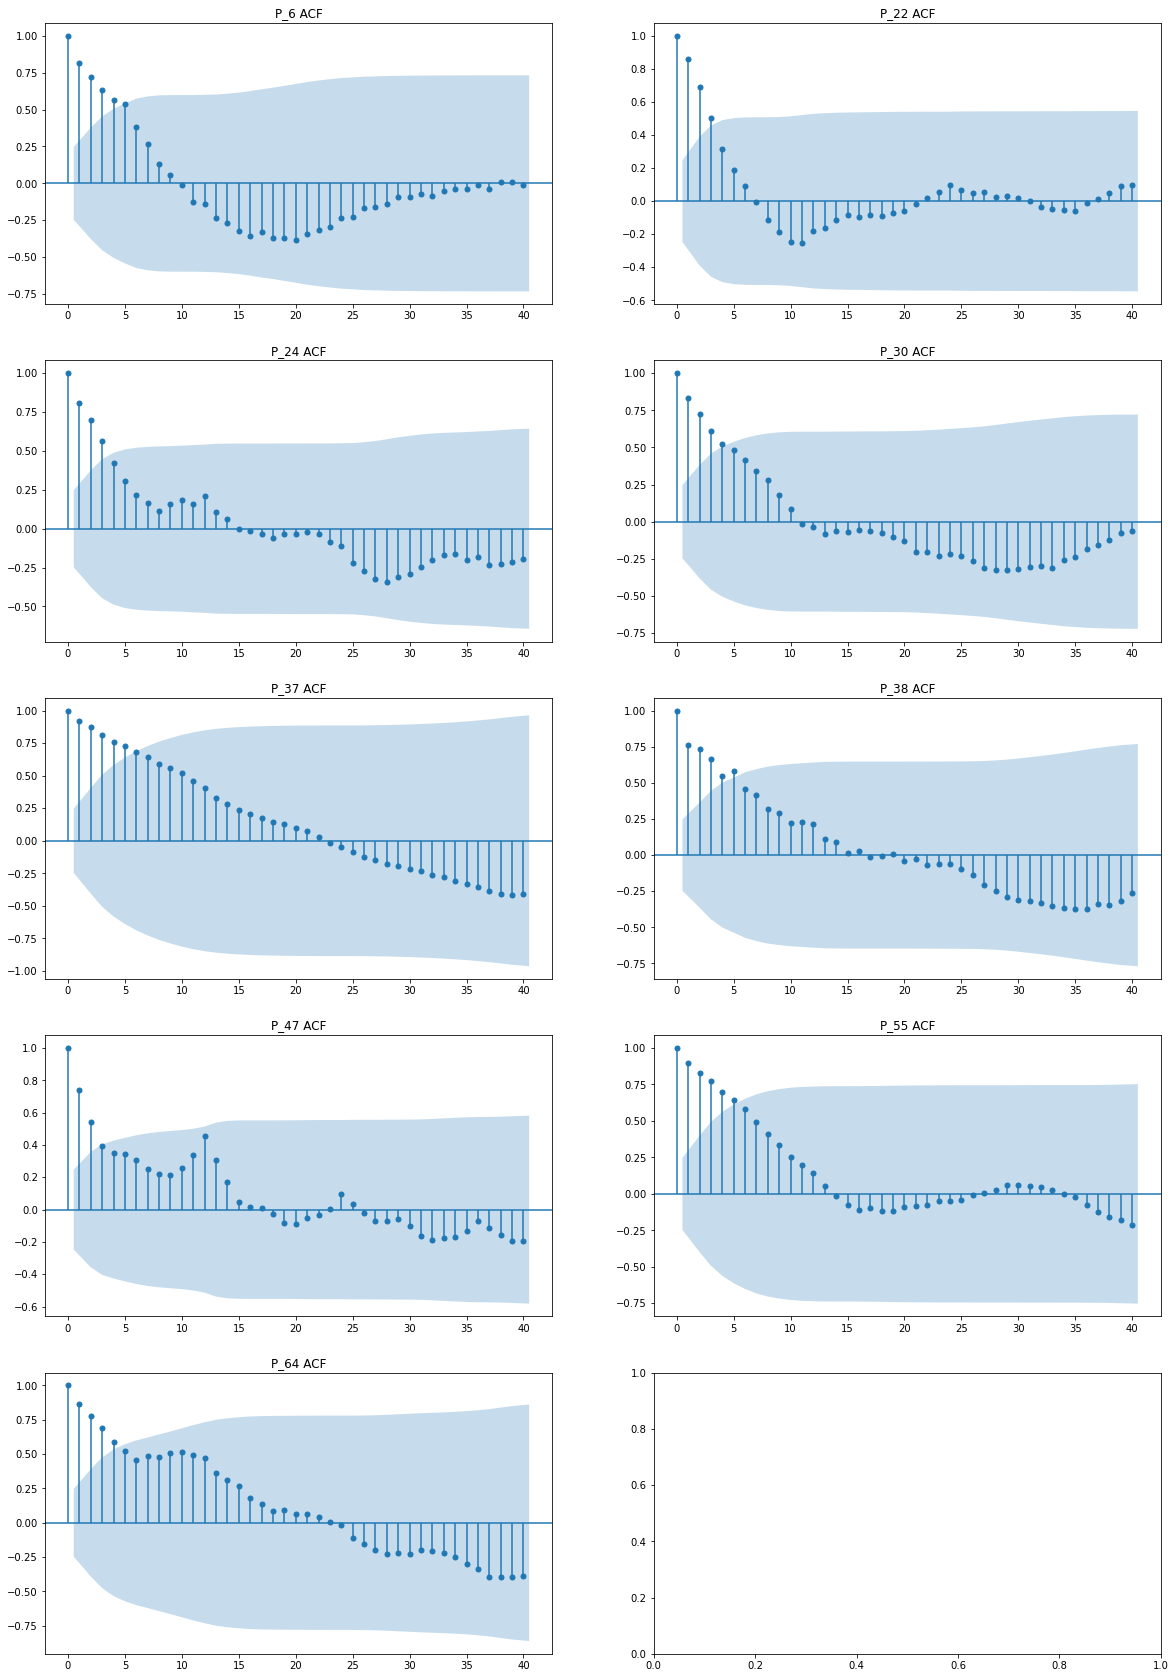

In [77]:
fig, axes = plt.subplots(5, 2, figsize=(20, 30), sharex=False)
axs = axes.flatten()
alpha=.05
for i, col in enumerate(sales_s.columns):
    sm.graphics.tsa.plot_acf(sales_s[col].values.squeeze(), lags=40, ax=axs[i], title=f"{col} ACF", alpha=alpha)

D'après les correlogrames des séries temporelles ci dessus, on peut constater que la fonction d'autocorrelation se dégrade ou diminue lentement, ce qui indique la non stationnarité des séries.
De plus, dans les deux séries des produits p_47 et p_64 l'ACF montre une oscillation et des pics qui se reproduisent avec des décalages de 12 mois indicant un effet de saisonnalité.

In [78]:
from pmdarima.arima.utils import nsdiffs
from pmdarima.arima.utils import ndiffs
def Oui_non(x): 
    return "Oui" if x else "Non"
def test_all(y):
    y = y.dropna()
    n_ch = nsdiffs(y, m=12, max_D=12, test='ch')
    n_ocsb = nsdiffs(y, m=12, max_D=12, test='ocsb')
    n_adf = ndiffs(y, test='adf')
    n_kpss = ndiffs(y, test='kpss')
    n_pp = ndiffs(y, test='pp')
    return (Oui_non(n_ch), Oui_non(n_ocsb), max(n_ch, n_ocsb), Oui_non(n_adf), \
            Oui_non(n_kpss), Oui_non(n_pp), max(n_adf, n_kpss, n_pp))

In [89]:
res = pd.DataFrame(sales_s.columns, columns=["Series"])
res[1], res[2], res[3], res[4], res[5], res[6], res[7] = [[test_all(sales_s[i])[j]\
                                           for i in sales_s.columns] for j in range(7)]
res=res.set_index("Series")
res.columns = ["Canova-Hansen", "OCSB", "Seasonality Order", "ADF", "KPSS", "PP", "differencing order"]
res

Canova-Hansen OCSB  Seasonality Order  ADF KPSS   PP  \
Series                                                        
P_6              Non  Non                  0  Oui  Non  Oui   
P_22             Non  Non                  0  Oui  Oui  Oui   
P_24             Non  Non                  0  Oui  Oui  Oui   
P_30             Non  Non                  0  Oui  Oui  Oui   
P_37             Non  Non                  0  Oui  Oui  Non   
P_38             Non  Non                  0  Oui  Oui  Non   
P_47             Non  Oui                  1  Non  Oui  Non   
P_55             Non  Non                  0  Oui  Oui  Oui   
P_64             Non  Oui                  1  Non  Oui  Non   

        differencing order  
Series                      
P_6                      1  
P_22                     1  
P_24                     1  
P_30                     1  
P_37                     1  
P_38                     1  
P_47                     1  
P_55                     1  
P_64                     1

In [92]:
stationnaries = sales_s.copy()
stationnaries = stationnaries.diff(1).iloc[1:]
stationnaries.loc[:,["P_47", "P_64"]] = stationnaries.loc[:,["P_47", "P_64"]].diff(12)
stationnaries.head()

P_6    P_22   P_24    P_30   P_37   P_38  P_47   P_55  P_64
2014-08-31 -274.0   852.0  273.0  -688.0  178.0  294.0   NaN  131.0   NaN
2014-09-30  -93.0  -363.0  115.0 -1782.0  145.0   55.0   NaN -193.0   NaN
2014-10-31 -262.0 -1134.0 -157.0 -1348.0  109.0  -36.0   NaN  -42.0   NaN
2014-11-30  181.0   605.0   -1.0   396.0  135.0 -288.0   NaN  116.0   NaN
2014-12-31  399.0  1141.0  675.0  3452.0   66.0  222.0   NaN  264.0   NaN

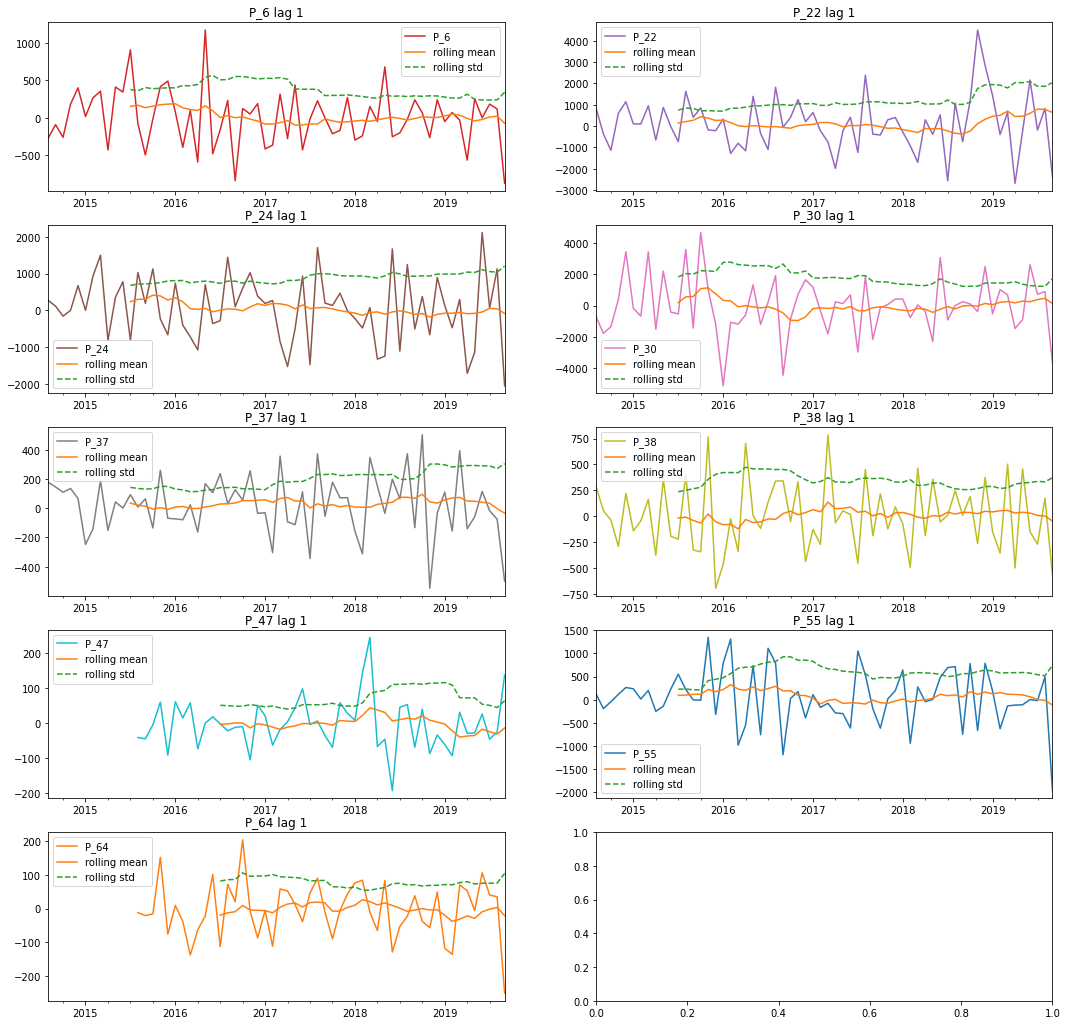

In [81]:
fig, axs = plt.subplots(5, 2, figsize=(18, 18))
axs = axs.flatten()
for i, item in enumerate(sales_s.columns):
    stationnaries[item].plot(title=f"{item} lag 1",
                     color=next(color_cycle),
                     ax=axs[i])
    stationnaries[item].rolling(12).mean().plot(
                     color=cols[1],
                     ax=axs[i], label="rolling mean")
    stationnaries[item].rolling(12).std().plot(
                     color=cols[2],
                     ax=axs[i], linestyle='--', label="rolling std")
    axs[i].legend()

In [91]:
res = pd.DataFrame(stationnaries.columns, columns=["Series"])
res[1], res[2], res[3], res[4], res[5], res[6], res[7] = [[test_all(stationnaries[i])[j]\
                                           for i in stationnaries.columns] for j in range(7)]
res=res.set_index("Series")
res.columns = ["Canova-Hansen", "OCSB", "Seasonality Order", "ADF", "KPSS", "PP", "differencing order"]
res

Canova-Hansen OCSB  Seasonality Order  ADF KPSS   PP  \
Series                                                        
P_6              Non  Non                  0  Oui  Non  Oui   
P_22             Non  Non                  0  Oui  Oui  Oui   
P_24             Non  Non                  0  Oui  Oui  Oui   
P_30             Non  Non                  0  Oui  Oui  Oui   
P_37             Non  Non                  0  Oui  Oui  Non   
P_38             Non  Non                  0  Oui  Oui  Non   
P_47             Non  Non                  0  Oui  Non  Oui   
P_55             Non  Non                  0  Oui  Oui  Oui   
P_64             Non  Non                  0  Oui  Non  Oui   

        differencing order  
Series                      
P_6                      1  
P_22                     1  
P_24                     1  
P_30                     1  
P_37                     1  
P_38                     1  
P_47                     1  
P_55                     1  
P_64                     1

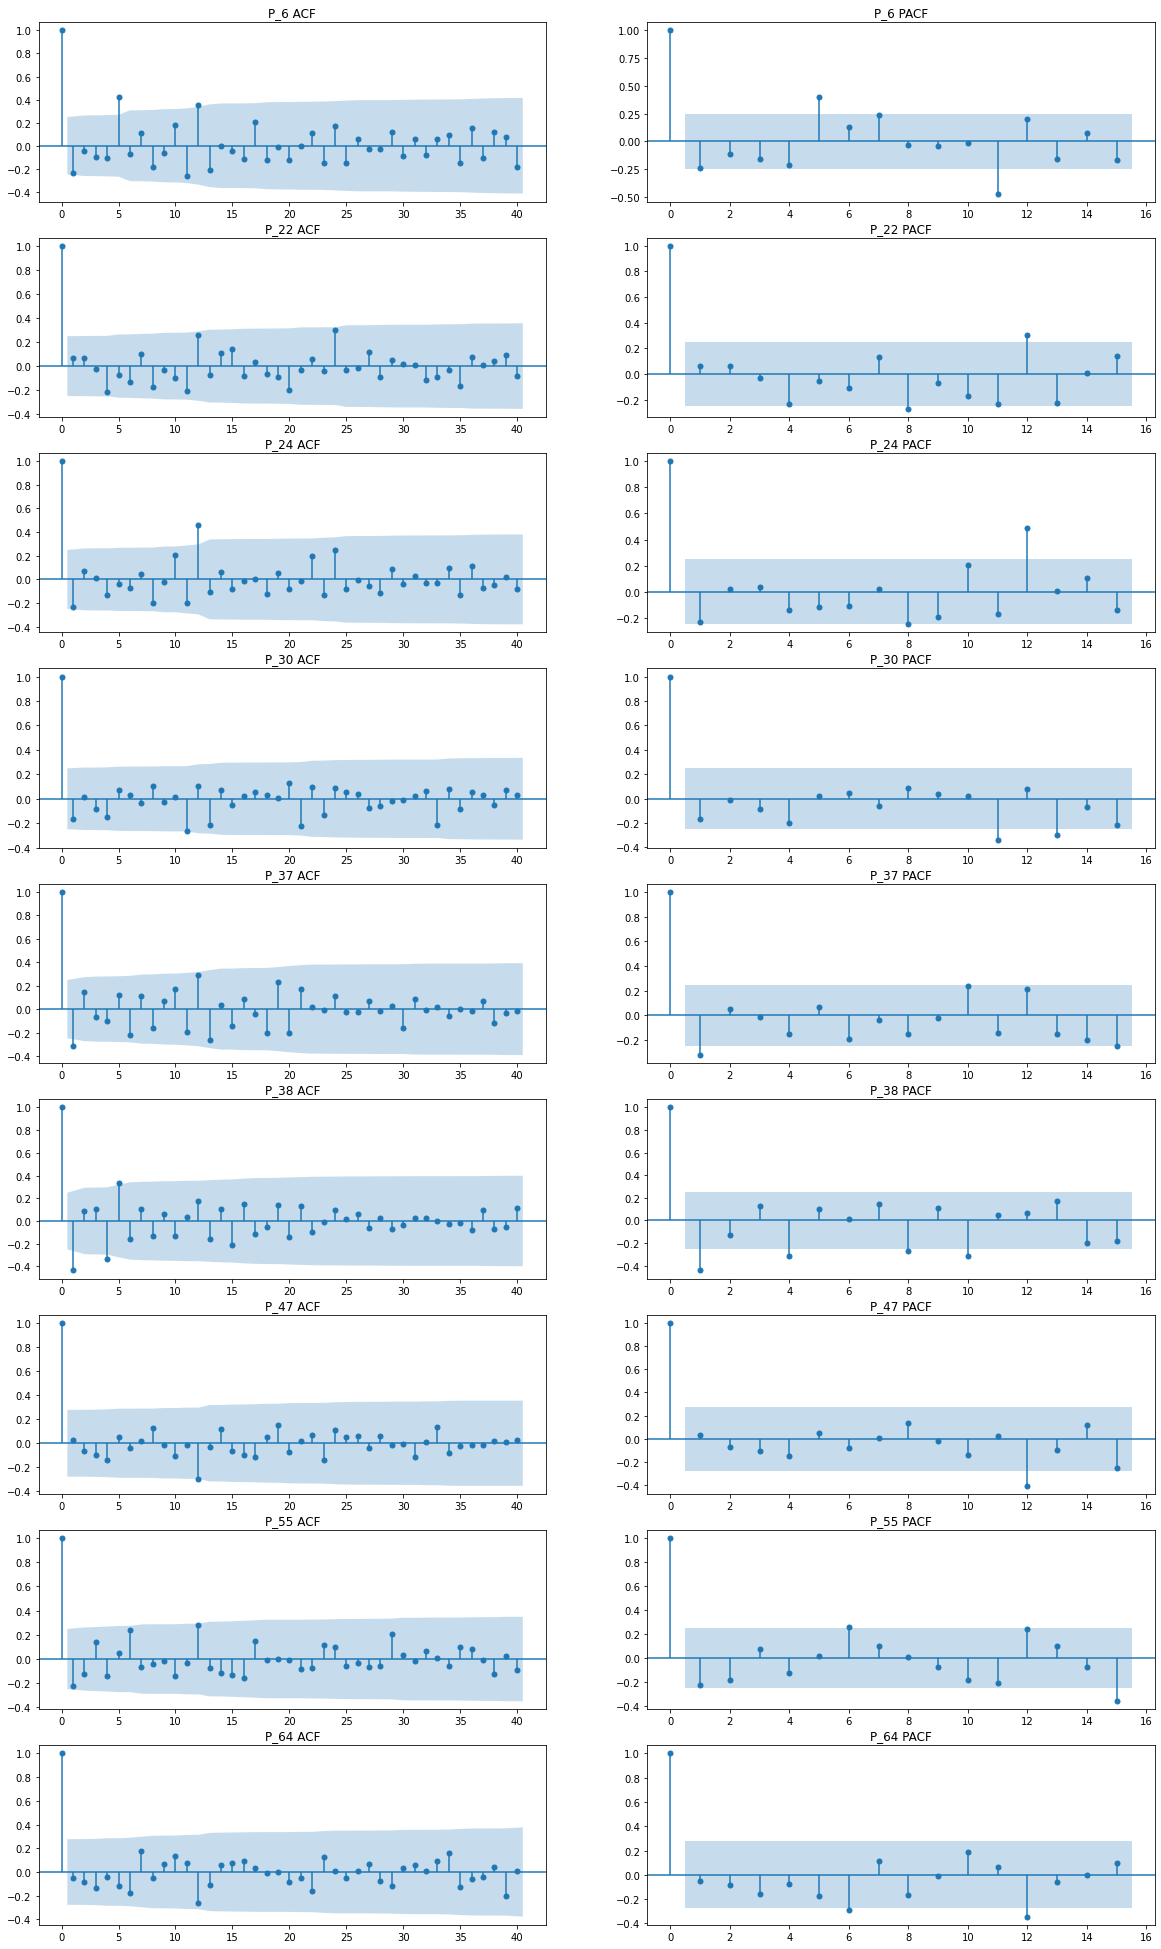

In [87]:
fig, axes = plt.subplots(9, 2, figsize=(20, 35), sharex=False)
alpha=.05
for i, col in enumerate(sales_s.columns):
    sm.graphics.tsa.plot_acf(stationnaries[col].dropna().values.squeeze(), lags=40, \
                             ax=axes[i,0], title=f"{col} ACF", alpha=alpha)
    sm.graphics.tsa.plot_pacf(stationnaries[col].dropna().values.squeeze(), lags=15, \
                              ax=axes[i,1], title=f"{col} PACF", alpha=alpha)

In [172]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

models = [0]*len(sales_s.columns)
for i, col in enumerate(sales_s.columns):
    models[i] = pm.auto_arima(sales_s[col], start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=12,              # frequency of series
    #                       d=None,           # let model determine 'd'
    #                       seasonal=True,   # No Seasonality
    #                       start_P=0, 
    #                       D=0, 
#                           trace=True,
    #                       error_action='ignore',  
    #                       suppress_warnings=True, 
                          stepwise=True)

Must read : \
https://www.kddanalytics.com/practical-time-series-forecasting-deterministic-stochastic-trend-2/ \
https://otexts.com/fpp2/stochastic-and-deterministic-trends.html \
http://alkaline-ml.com/pmdarima/tips_and_tricks.html

In [176]:
train_arima = sales_s.loc[:'2018-12-31']
test_arima = sales_s.loc['2019-01-31':]

In [126]:
sales_s.tail()

P_6   P_22   P_24   P_30  P_37  P_38  P_47  P_55  P_64
2019-05-31  2900  16956   9002  17768  3841  4548   896  8133  1634
2019-06-30  2899  19116  11119  20384  3956  4400   827  8137  1597
2019-07-31  3081  18930  11182  21106  3938  4134   844  8117  1560
2019-08-31  3198  19762  12311  22010  3863  4309   829  8612  1817
2019-09-30  2322  17386  10262  18321  3365  3742   875  6647  1618

In [127]:
pd.date_range("2019-10-31", periods=12, freq="m")

DatetimeIndex(['2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
train_arima = sales_s.loc[:'2018-12-31']
test_arima = sales_s.loc['2019-01-31':] 

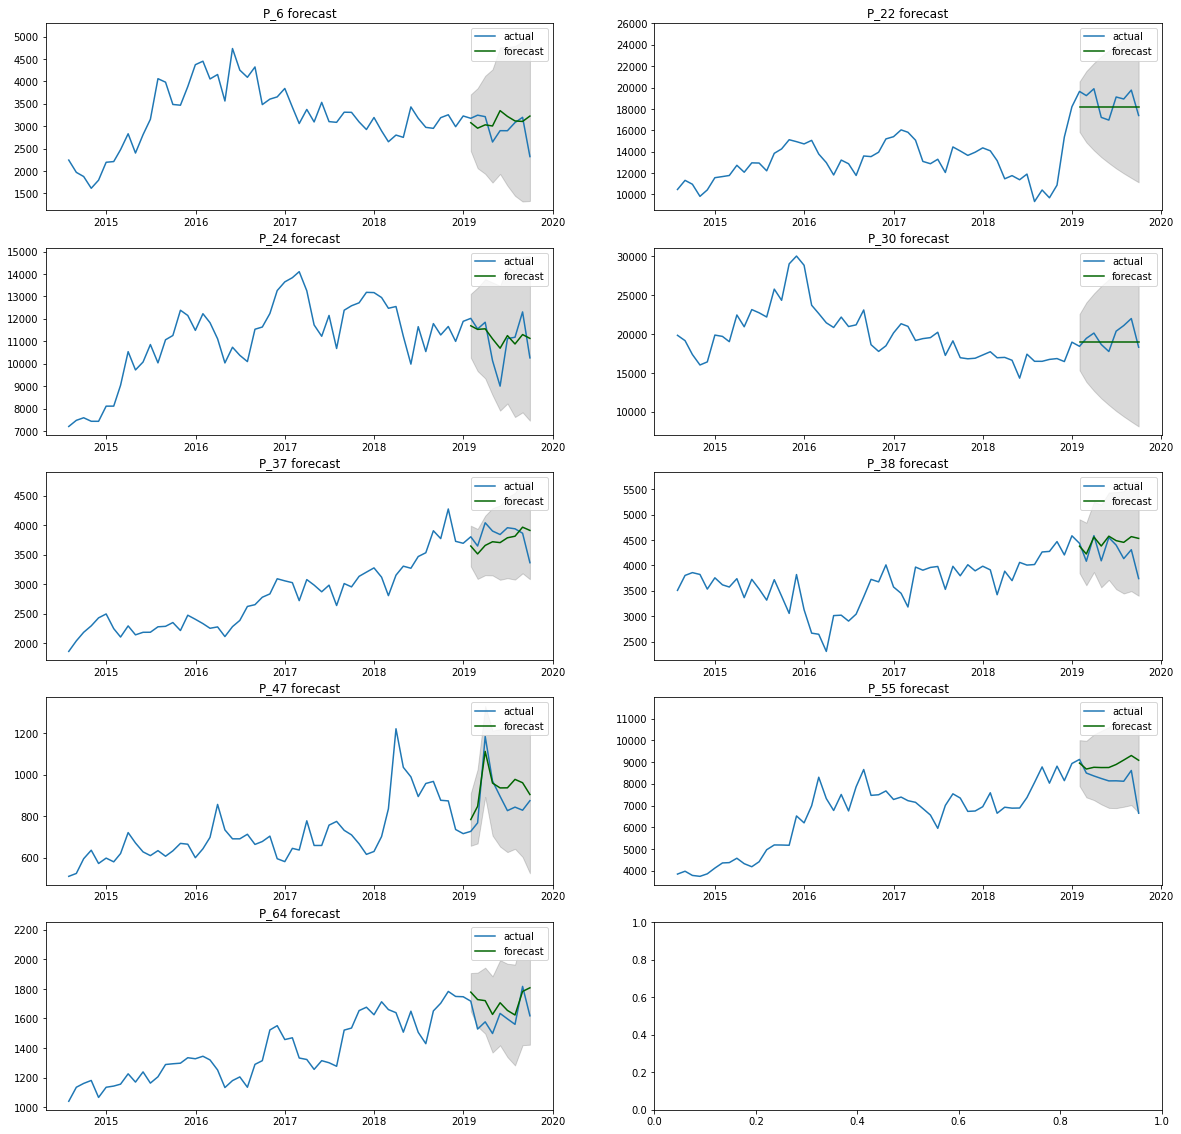

In [180]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
fitted_dynamic = [0]*len(sales_s.columns)
for i, item in enumerate(sales_s.columns):
    fitted_dynamic[i] = models[i].fit(train_arima.iloc[:,i])
    fc, confint = fitted_dynamic[i].predict(n_periods=9, return_conf_int=True)
    index_of_fc = sales_s.loc['2019-01-31':].index

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    axs[i].plot(sales_s.iloc[:,i], label="actual")
    axs[i].plot(fc_series, color='darkgreen', label="forecast")
    axs[i].fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)
    axs[i].set_title(f"{item} forecast")
    axs[i].legend()

In [149]:
test_arima

P_6   P_22   P_24   P_30  P_37  P_38  P_47  P_55  P_64
2019-01-31  3176  19638  12023  18435  3803  4435   727  9120  1717
2019-02-28  3246  19246  11552  19459  3647  4083   768  8494  1528
2019-03-31  3213  19889  11850  20140  4040  4586  1185  8360  1577
2019-04-30  2647  17209  10140  18673  3900  4091   970  8244  1498
2019-05-31  2900  16956   9002  17768  3841  4548   896  8133  1634
2019-06-30  2899  19116  11119  20384  3956  4400   827  8137  1597
2019-07-31  3081  18930  11182  21106  3938  4134   844  8117  1560
2019-08-31  3198  19762  12311  22010  3863  4309   829  8612  1817
2019-09-30  2322  17386  10262  18321  3365  3742   875  6647  1618

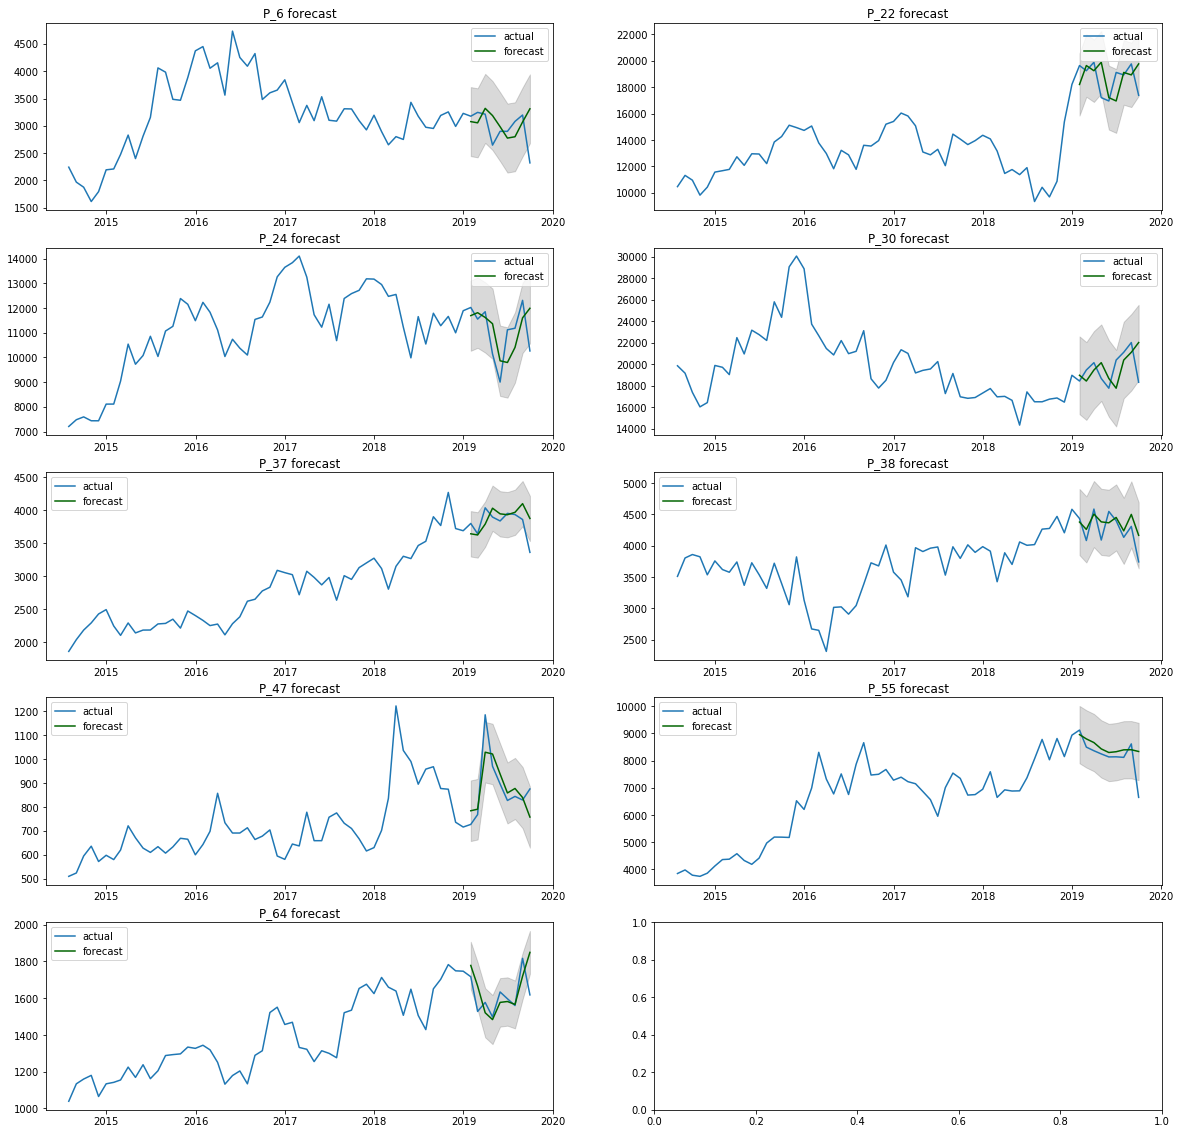

In [181]:
index_of_fc = sales_s.loc['2019-01-31':].index
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
fitted_static = [0]*len(sales_s.columns)
for i, item in enumerate(sales_s.columns):
    fitted_static[i] = models[i].fit(train_arima.iloc[:,i])
    preds =np.zeros((len(test_arima)))
    conf_int = np.zeros((len(test_arima),2))

    for j in range(len(test_arima)):
        new_preds, new_conf_int = fitted_static[i].predict(n_periods=1, return_conf_int=True)
        fitted_static[i].update([test_arima.iloc[j,i]])
        preds[j] = new_preds
        conf_int[j] = new_conf_int


    # make series for plotting purpose
#     fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(conf_int[:, 0], index=index_of_fc)
    upper_series = pd.Series(conf_int[:, 1], index=index_of_fc)
    
    axs[i].plot(sales_s.iloc[:,i], label="actual")
    axs[i].plot(pd.Series(preds, index=index_of_fc), color='darkgreen', label="forecast")
    axs[i].fill_between(test_arima.iloc[:,i].index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)
    axs[i].set_title(f"{item} forecast")
    axs[i].legend()

Ljung-Box (Q) : \
    H0: The residuals are independently distributed.\
    H1: The residuals are not independently distributed; they exhibit serial correlation.\
    Prob(Q)<0.05   =>   the residuals are not independent


Heteroskedasticity (H):\
    H0: The null hypothesis is of no heteroskedasticity.\
    H1: heteroskedasticity.\
    Prob(H)<0.05   =>   heteroskedasticity.


Jarque-Bera (JB):\
    H0: Normality\
    H1: No normality\
    Prob(H)<0.05   =>   no normality

In [236]:
def Oui_non(x):
    return "Vérifié" if x else "Non" 

In [237]:
res = pd.DataFrame(columns=['Prob(Q)', 'Bruit Blanc', 'Prob(H)','Homoskedasticity','Prob(JB)','Normalité'])
for i in range(len(sales_s.columns)):
    tbl = models[i].summary().tables[2].data
    res = res.append({"Prob(Q)": float(tbl[1][1]), "Bruit Blanc": Oui_non(float(tbl[1][1])>0.05), \
                      "Prob(H)": float(tbl[3][1]), "Homoskedasticity": Oui_non(float(tbl[3][1])>0.05), \
                      "Prob(JB)": float(tbl[1][3]), "Normalité": Oui_non(float(tbl[1][3])>0.05)}\
                     ,ignore_index=True)
res.set_index(sales_s.columns)

Prob(Q) Bruit Blanc  Prob(H) Homoskedasticity  Prob(JB) Normalité
P_6      0.08     Vérifié     0.73          Vérifié      0.29   Vérifié
P_22     0.13     Vérifié     0.00              Non      0.01       Non
P_24     0.99     Vérifié     0.65          Vérifié      0.34   Vérifié
P_30     0.54     Vérifié     0.09          Vérifié      0.50   Vérifié
P_37     0.68     Vérifié     0.00              Non      0.06   Vérifié
P_38     0.73     Vérifié     0.02              Non      0.49   Vérifié
P_47     0.97     Vérifié     0.10          Vérifié      0.00       Non
P_55     0.68     Vérifié     0.71          Vérifié      0.40   Vérifié
P_64     0.02         Non     0.69          Vérifié      0.28   Vérifié

In [1]:
# import pmdarima
# import arch

# # fit ARIMA on returns 
# arima_model = models[5]
# arima_residuals = arima_model.arima_res_.resid

# # fit a GARCH(1,1) model on the residuals of the ARIMA model
# garch = arch.arch_model(arima_residuals, p=1, q=1)
# garch_model = garch.fit()

# # Use ARIMA to predict mu
# predicted_mu = arima_model.predict(n_periods=9)
# print("here : ", predicted_mu)
# # Use GARCH to predict the residual
# garch_forecast = garch_model.forecast(horizon=9)
# predicted_et = garch_forecast.mean['h.1'].iloc[-1]
# print("here : ", predicted_et)
# # Combine both models' output: yt = mu + et
# prediction = predicted_mu + predicted_et

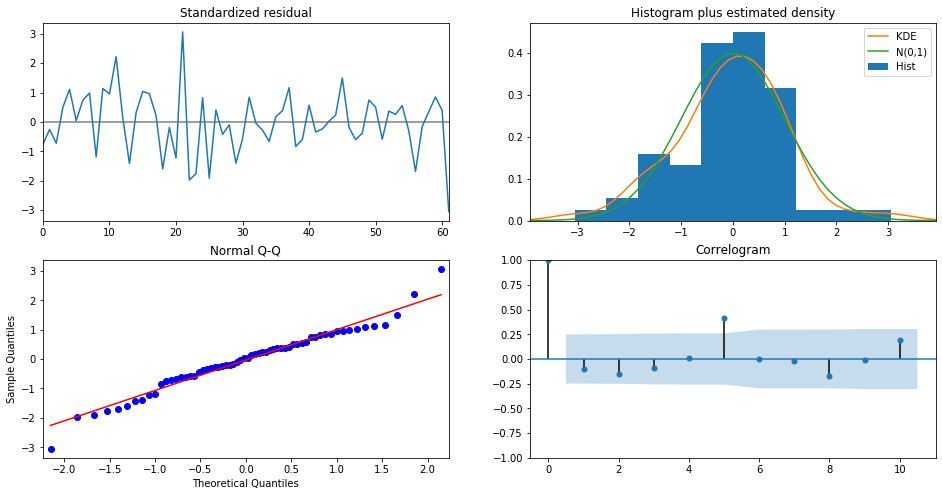

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   63
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -449.587
Date:                            Tue, 15 Jun 2021   AIC                            903.174
Time:                                    18:54:42   BIC                            907.428
Sample:                                         0   HQIC                           904.845
                                             - 63                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.4503      0.101      4.460      0.000       0.252       0.648
sigma2      1.036e+05   1.42e+04      7.299      0.000    7.58e+04    1.31e+05
===================================================================================
Ljung-Box (Q):                       53.13   Jarque-Bera (JB):                 2.49
Prob(Q):                              0.08   Prob(JB):                         0.29
Heteroskedasticity (H):               0.86   Skew:                            -0.12
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

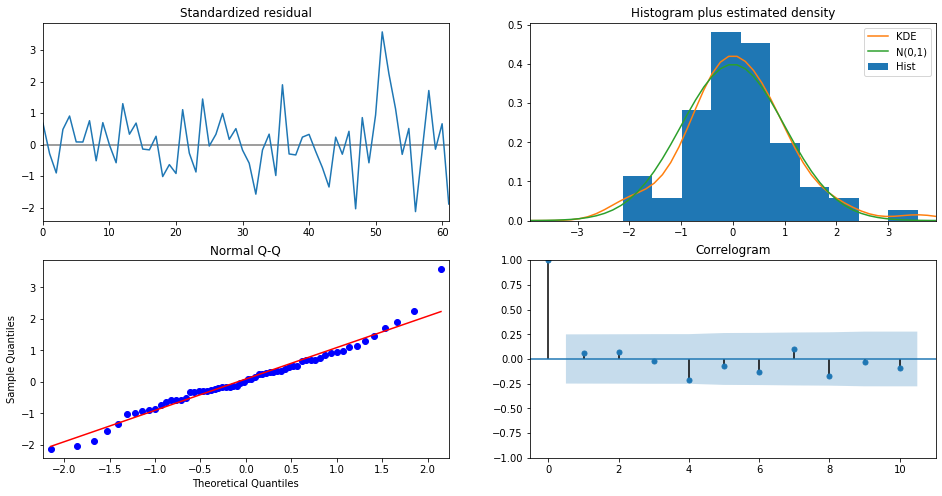

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -530.559
Date:                Tue, 15 Jun 2021   AIC                           1063.119
Time:                        18:54:44   BIC                           1065.246
Sample:                             0   HQIC                          1063.954
                                 - 63                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.585e+06    2.1e+05      7.558      0.000    1.17e+06       2e+06
===================================================================================
Ljung-Box (Q):                       50.27   Jarque-Bera (JB):                 8.43
Prob(Q):                              0.13   Prob(JB):                         0.01
Heteroskedasticity (H):               4.56   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

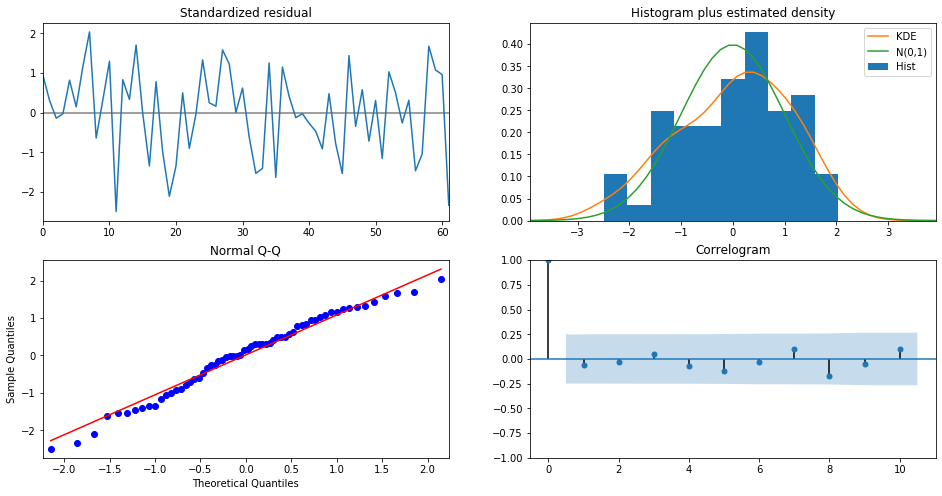

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   63
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                -502.138
Date:                             Tue, 15 Jun 2021   AIC                           1010.275
Time:                                     18:54:46   BIC                           1016.657
Sample:                                          0   HQIC                          1012.781
                                              - 63                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1770      0.097     -1.834      0.067      -0.366       0.012
ar.S.L12       0.4572      0.073      6.284      0.000       0.315       0.600
sigma2       5.28e+05   1.15e+05      4.610      0.000    3.04e+05    7.52e+05
===================================================================================
Ljung-Box (Q):                       22.86   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.99   Prob(JB):                         0.34
Heteroskedasticity (H):               0.82   Skew:                            -0.35
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

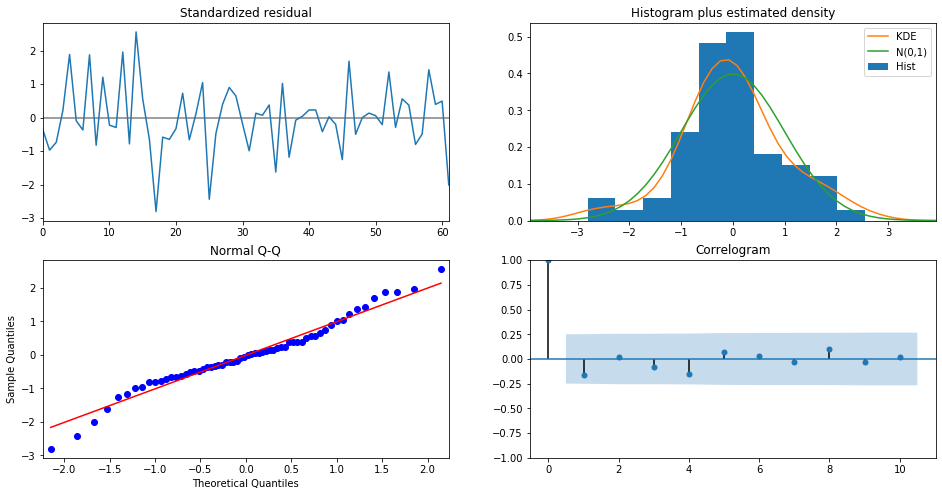

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -553.969
Date:                Tue, 15 Jun 2021   AIC                           1109.939
Time:                        18:54:47   BIC                           1112.066
Sample:                             0   HQIC                          1110.774
                                 - 63                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.366e+06   5.16e+05      6.519      0.000    2.35e+06    4.38e+06
===================================================================================
Ljung-Box (Q):                       38.55   Jarque-Bera (JB):                 1.37
Prob(Q):                              0.54   Prob(JB):                         0.50
Heteroskedasticity (H):               0.47   Skew:                            -0.03
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

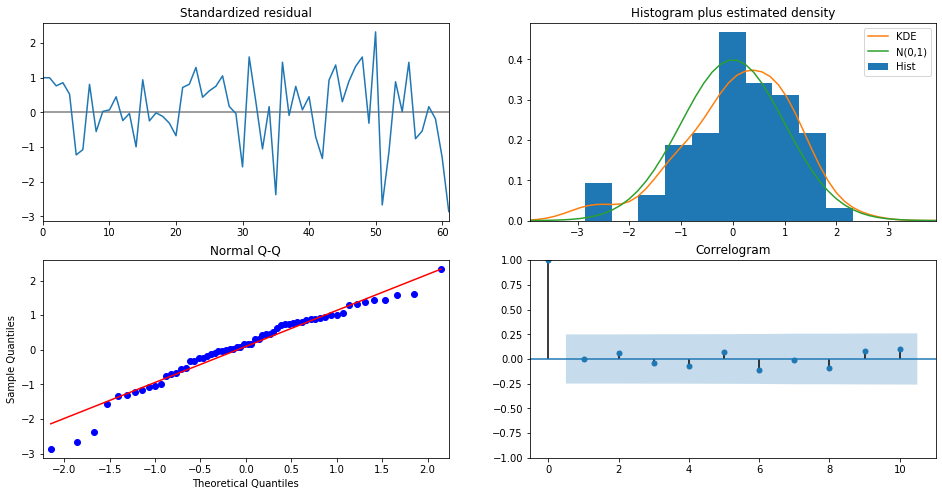

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   63
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -411.987
Date:                            Tue, 15 Jun 2021   AIC                            829.975
Time:                                    18:54:49   BIC                            836.356
Sample:                                         0   HQIC                           832.480
                                             - 63                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2460      0.097     -2.542      0.011      -0.436      -0.056
ar.S.L12       0.3784      0.126      2.997      0.003       0.131       0.626
sigma2      3.064e+04   4852.945      6.314      0.000    2.11e+04    4.02e+04
===================================================================================
Ljung-Box (Q):                       35.31   Jarque-Bera (JB):                 5.49
Prob(Q):                              0.68   Prob(JB):                         0.06
Heteroskedasticity (H):               3.79   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

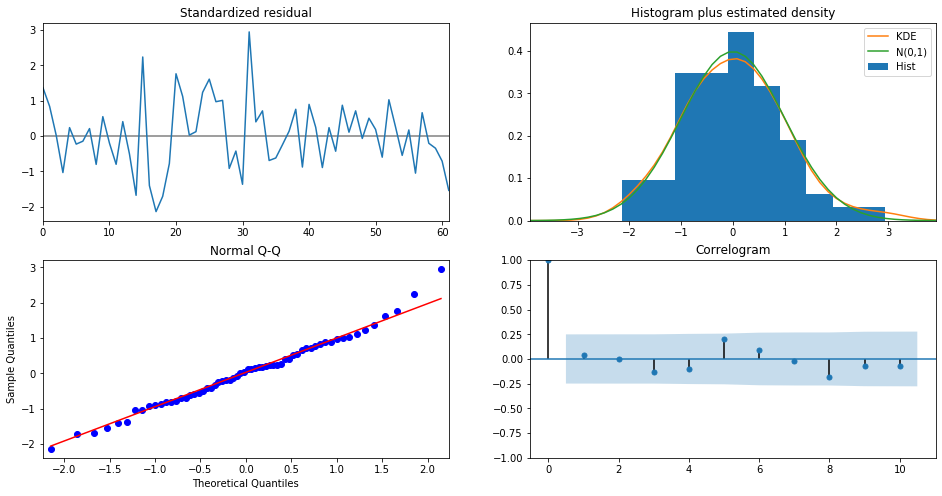

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   63
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood                -434.691
Date:                             Tue, 15 Jun 2021   AIC                            881.382
Time:                                     18:54:50   BIC                            894.145
Sample:                                          0   HQIC                           886.393
                                              - 63                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3197      0.165     -8.018      0.000      -1.642      -0.997
ar.L2         -0.5661      0.111     -5.101      0.000      -0.784      -0.349
ma.L1          0.8918      0.140      6.364      0.000       0.617       1.166
ar.S.L12       0.1837      0.172      1.071      0.284      -0.153       0.520
ar.S.L24       0.2227      0.250      0.890      0.373      -0.267       0.713
sigma2      7.281e+04   1.49e+04      4.873      0.000    4.35e+04    1.02e+05
===================================================================================
Ljung-Box (Q):                       34.26   Jarque-Bera (JB):                 1.42
Prob(Q):                              0.73   Prob(JB):                         0.49
Heteroskedasticity (H):               0.34   Skew:                             0.33
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

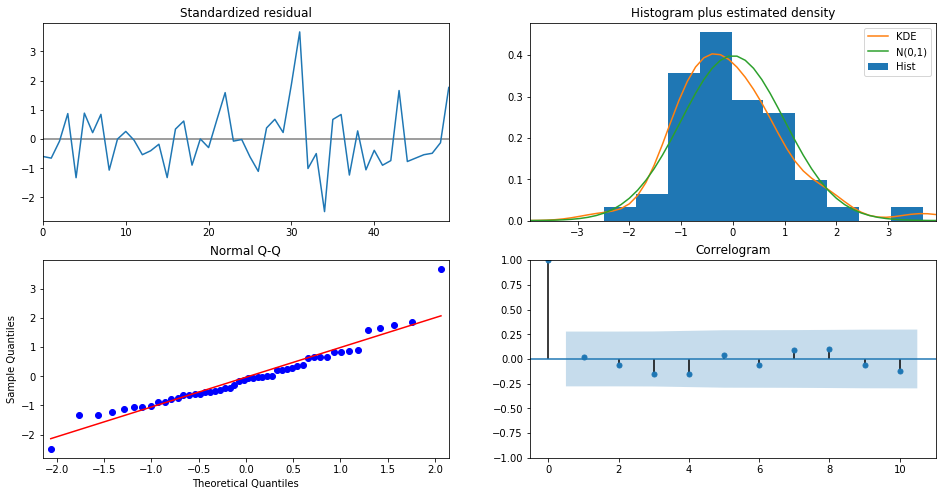

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   63
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -281.499
Date:                            Tue, 15 Jun 2021   AIC                            566.999
Time:                                    18:54:51   BIC                            570.823
Sample:                                         0   HQIC                           568.455
                                             - 63                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3158      0.122     -2.595      0.009      -0.554      -0.077
sigma2      4258.8318    593.645      7.174      0.000    3095.310    5422.354
===================================================================================
Ljung-Box (Q):                       24.51   Jarque-Bera (JB):                17.03
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                             0.92
Prob(H) (two-sided):                  0.10   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

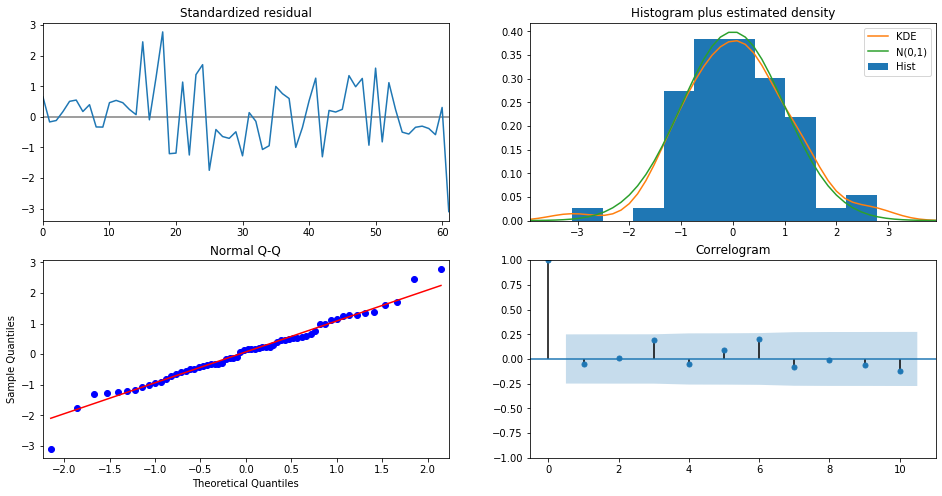

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   63
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                -479.358
Date:                             Tue, 15 Jun 2021   AIC                            964.717
Time:                                     18:54:53   BIC                            971.098
Sample:                                          0   HQIC                           967.222
                                              - 63                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2705      0.117     -2.306      0.021      -0.500      -0.041
ar.S.L12       0.3422      0.142      2.418      0.016       0.065       0.620
sigma2      2.886e+05   4.51e+04      6.399      0.000       2e+05    3.77e+05
===================================================================================
Ljung-Box (Q):                       35.34   Jarque-Bera (JB):                 1.83
Prob(Q):                              0.68   Prob(JB):                         0.40
Heteroskedasticity (H):               1.18   Skew:                            -0.02
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

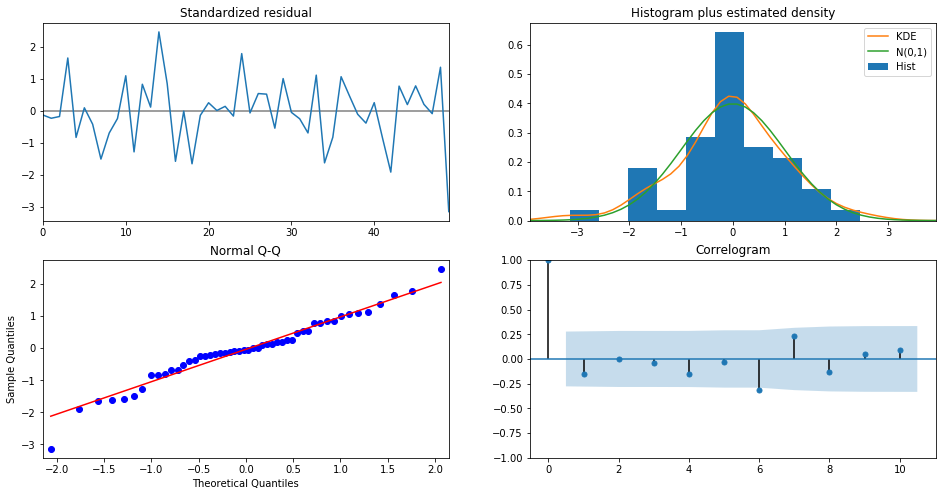

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   63
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -290.063
Date:                              Tue, 15 Jun 2021   AIC                            584.127
Time:                                      18:54:54   BIC                            587.951
Sample:                                           0   HQIC                           585.583
                                               - 63                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9753      3.313     -0.294      0.768      -7.469       5.518
sigma2      4324.2276   1.37e+04      0.315      0.753   -2.26e+04    3.12e+04
===================================================================================
Ljung-Box (Q):                       61.41   Jarque-Bera (JB):                 2.57
Prob(Q):                              0.02   Prob(JB):                         0.28
Heteroskedasticity (H):               1.22   Skew:                            -0.34
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [199]:
for i in range(len(sales_s.columns)):
    models[i].plot_diagnostics(figsize=(16,8))
    plt.show()
    display(models[i].summary())